In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('ufo-sightings/scrubbed.csv', error_bad_lines=False)
df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


# Comments

In [107]:
stop_words2 = ['saw', 'shaped', 'seen', 'like', 'two', '3', 'across', 'one', '2', 'shape', 'three', 'pd))', '((nuforc', 'looked', 'around', 'near','20', 'made'
              'observed', '5', '4', 'minutes', '-', 'looking', 'away', 'area', 'went', 'time', 'noticed', 'seconds', '','came', 'changed', 'pm', 'could', 'second',
              'going', 'direction', 'see', 'witnessed', 'possible', 'side', 'light', '&amp;', 'feet', 'us', 'changing', 'four', 'close', 'altitude', 'right', 'ca',
              'several', 'left', 'towards', '1', 'note:', 'min', '30', 'extremely', '6', '10', 'size', 'mile', 'ft', 'times', 'hour', 'approximately', 'pa', 'almost']
stop_words = stop_words + stop_words2

In [108]:
keys = list(freq_dict.keys())

for word in keys:
    if word in stop_words:
        # removing stopwords
        del freq_dict[word]
        
    # merging singular and plural of the same word
    if len(word) > 1 and word[-1] == 's' and word[:-1] in keys:
        try:
            freq_dict[word[:-1]] += freq_dict[word]
            del freq_dict[word]
        except:
            pass

In [109]:
freq_sorted = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)

In [111]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1000).generate_from_frequencies(freq_dict)

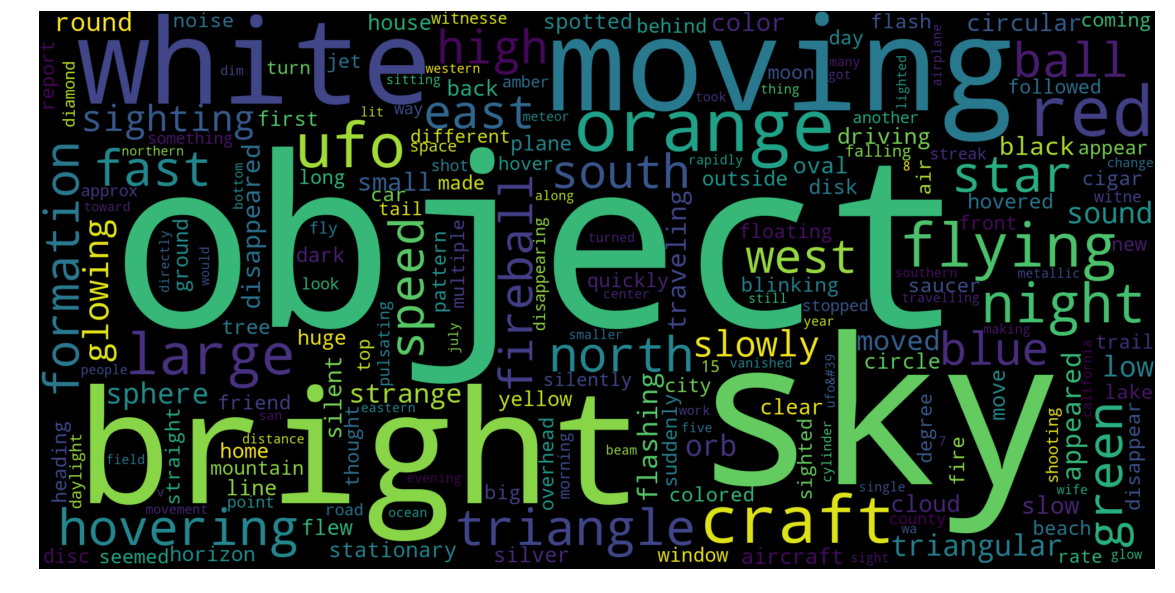

In [112]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 1D Visualization

In [5]:
citystate = []
for i in range(len(df['city'])):
    try:
        citystate.append(df['city'][i] + ', ' + df['state'][i])
    except:
        citystate.append(float('nan'))

df['city, state'] = citystate

## Frequency By City (Not Normalized)

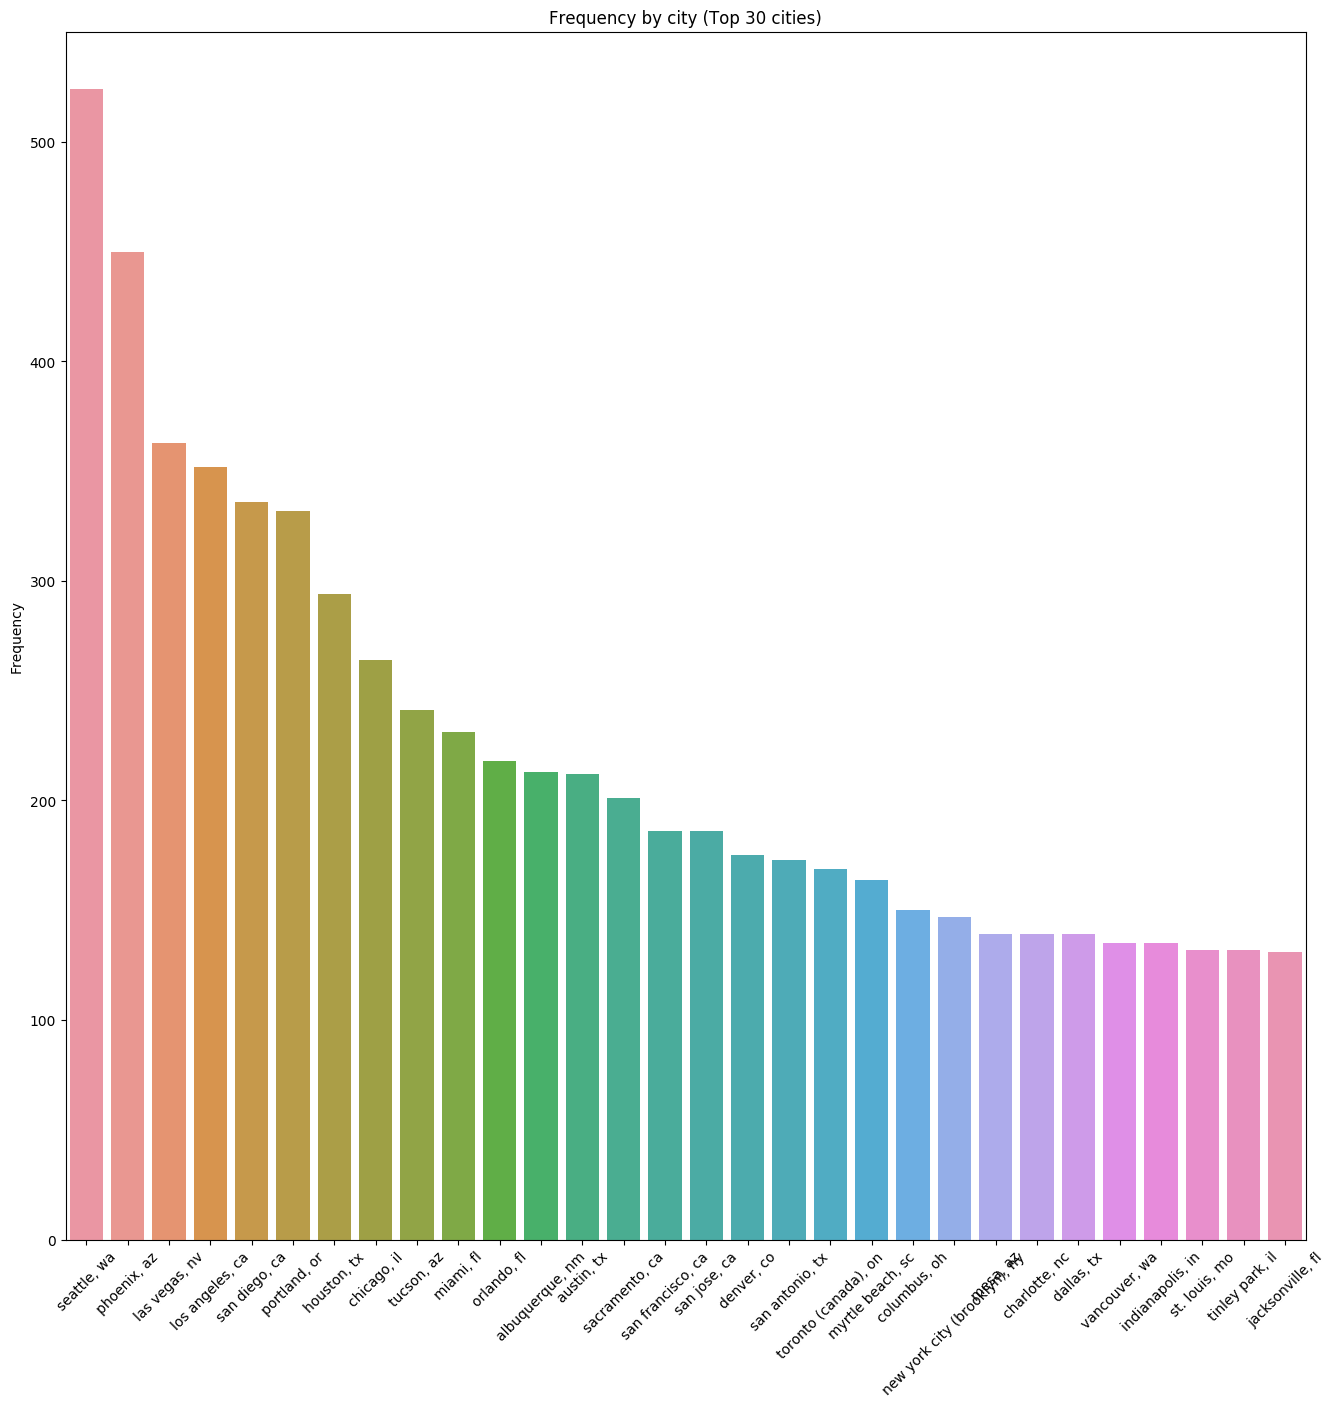

In [190]:
plt.figure(figsize=(16, 16), dpi=100)

cities = df['city, state'].value_counts().keys()[:30]
#cities = list(map(lambda x: x[0].upper() + x[1:], cities))
values = df['city, state'].value_counts().values[:30]

by_city = sns.barplot(cities, values)
plt.setp(by_city.get_xticklabels(), rotation=45)

plt.title('Frequency by city (Top 30 cities)')
plt.ylabel('Frequency')
plt.show()

## Frequency (Normalized by Urban Population)

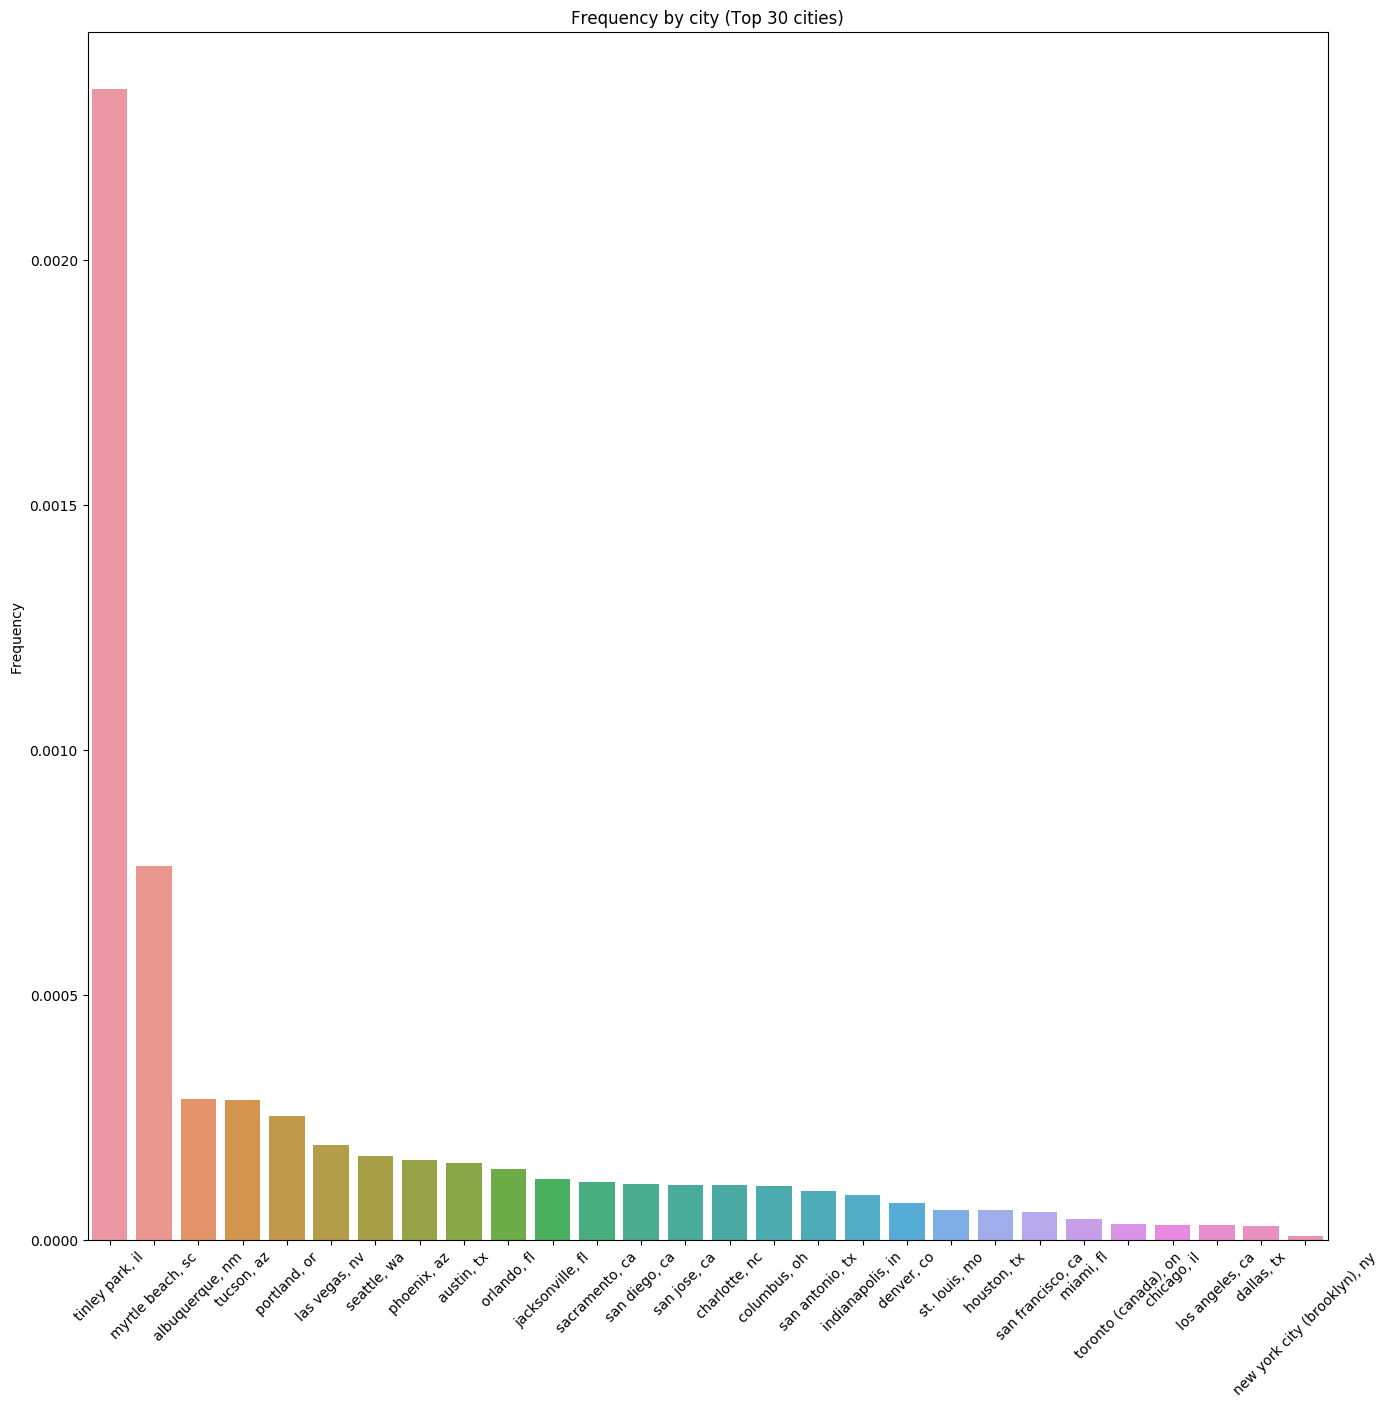

In [203]:
# phoenix - mesa 重複
# vancouver, waで計算
# ['Seattle, wa','Phoenix, az','Las vegas, nv','Los angeles, ca','San diego, ca','Portland, or','Houston, tx','Chicago, il','Tucson, az','Miami, fl','
# Orlando, fl','Albuquerque, nm','Austin, tx','Sacramento, ca','San francisco, ca','San jose, ca','Denver, co','San antonio, tx',
# 'Toronto (canada), on','Myrtle beach, sc','Columbus, oh','New york city (brooklyn), ny','Mesa, az','Charlotte, nc','Dallas, tx',
# 'Vancouver, wa','Indianapolis, in', 'St. louis, mo','Tinley park, il','Jacksonville, fl']
pop_list = [3059393, 3629114, 1886011, 12150996, 2956746, 1849898, 4944332, 8608208, 843168,5502379, 1510516, 741318,
           1362416, 1723634, 3281212, 1664496, 2374203, 1758210, 5429524, 215304, 1368035, 18351295, 3629114, 1249442, 5121892,
           183012, 1487483, 2150706, 56204, 1065219]

plt.figure(figsize=(16, 16), dpi=100)

cities = df['city, state'].value_counts().keys()[:30]
#cities = list(map(lambda x: x[0].upper() + x[1:], cities))
values = df['city, state'].value_counts().values[:30]
values = values / np.array(pop_list)

city_dict = {}
for i in range(30):
    city_dict[cities[i]] = values[i]

# combine phoenix & mesa, portland & vancouver
city_dict['phoenix, az'] += city_dict['mesa, az']
city_dict['portland, or'] += city_dict['vancouver, wa']*pop_list[(cities=='vancouver, wa').argmax()]/pop_list[(cities=='portland, or').argmax()]

city_dict = dict(sorted(city_dict.items(), key=lambda x: x[1], reverse=True))

del city_dict['vancouver, wa'], city_dict['mesa, az']

#by_city = sns.barplot(cities, values)
by_city = sns.barplot(list(city_dict.keys()), list(city_dict.values()))
plt.setp(by_city.get_xticklabels(), rotation=45)

plt.title('Frequency by city (Top 30 cities)')
plt.ylabel('Frequency')
plt.show()

In [204]:
df[df['city'] == 'tinley park']['datetime'].value_counts()[:10]

10/31/2004 20:00    17
8/21/2004 23:00      8
8/21/2004 22:00      7
9/30/2005 23:00      7
10/31/2004 19:30     5
10/31/2004 20:15     5
10/1/2005 01:00      5
8/21/2004 22:30      5
10/31/2004 21:00     5
10/31/2004 19:45     4
Name: datetime, dtype: int64

In [205]:
df[df['city'] == 'myrtle beach']['datetime'].value_counts()[:10]

9/9/2003 22:00      3
7/27/2007 21:00     2
7/22/2013 22:00     2
7/18/2013 22:00     2
10/24/2012 20:00    2
12/28/2013 19:00    2
9/29/2011 21:00     2
10/5/2001 23:00     1
10/30/2012 23:00    1
6/20/2013 22:00     1
Name: datetime, dtype: int64

### Frequency by State (Not Normalized)

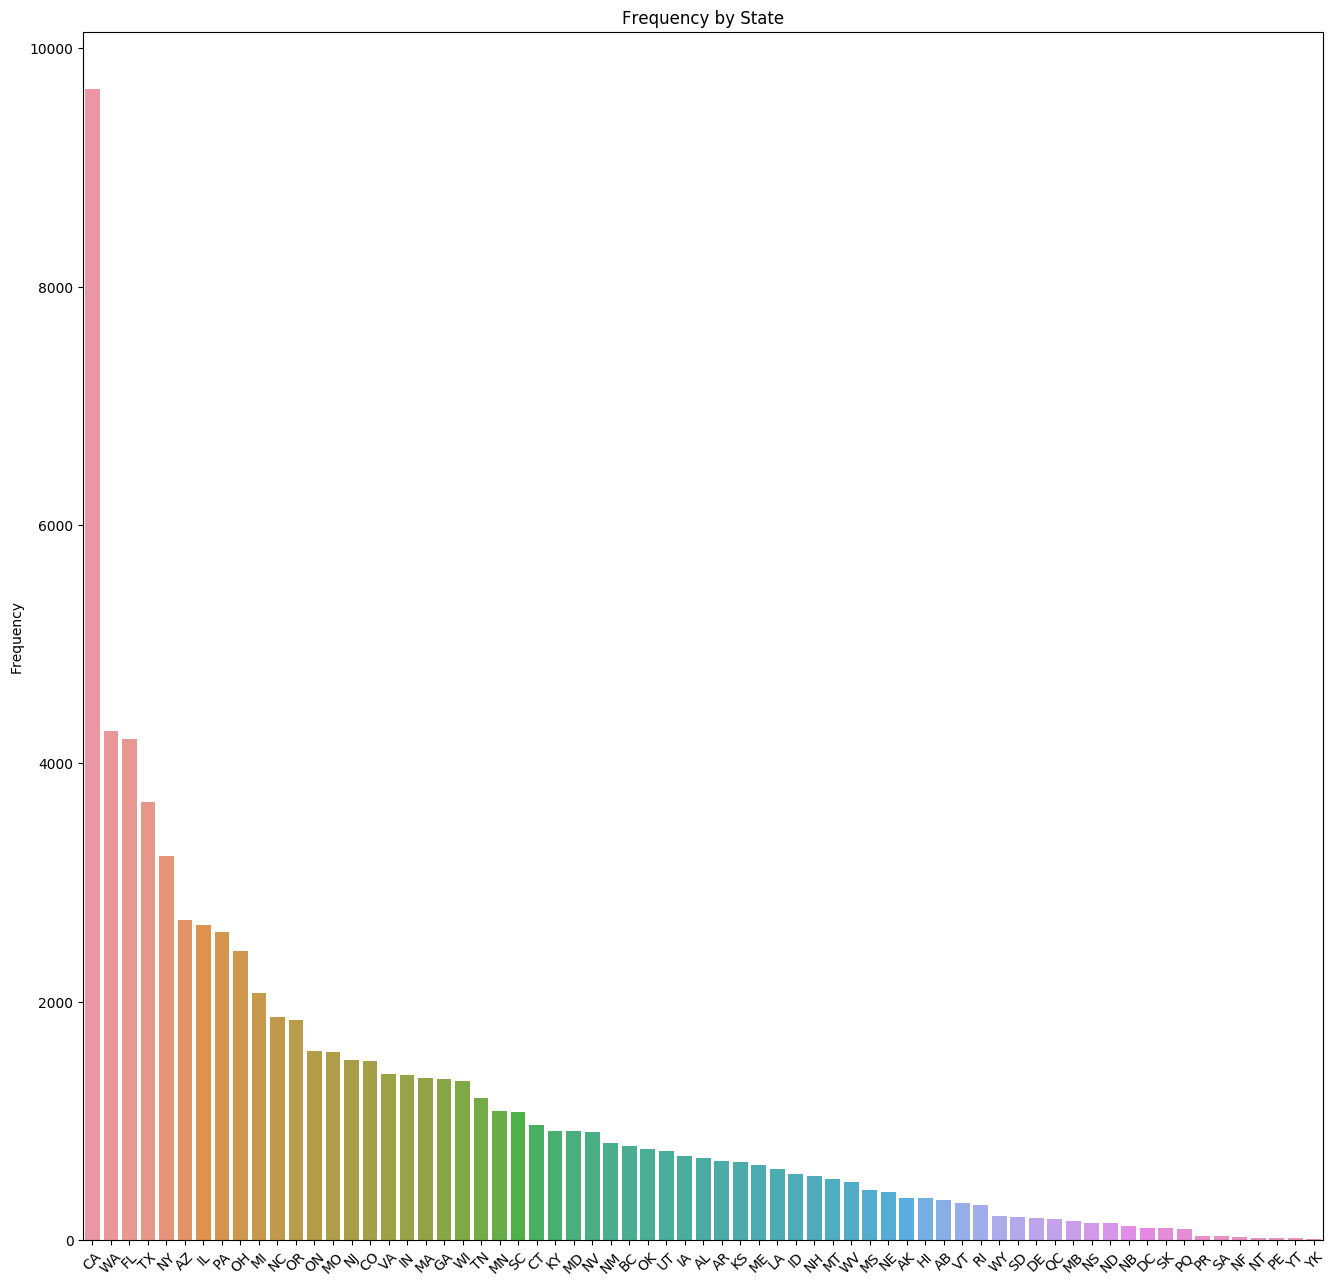

In [21]:
plt.figure(figsize=(16, 16), dpi=100)

states = df['state'].value_counts().keys()
states = list(map(lambda x: x.upper(), states))
values = df['state'].value_counts().values

by_state = sns.barplot(states, values)
plt.setp(by_state.get_xticklabels(), rotation=45)

plt.title('Frequency by State')
plt.ylabel('Frequency')
plt.show()

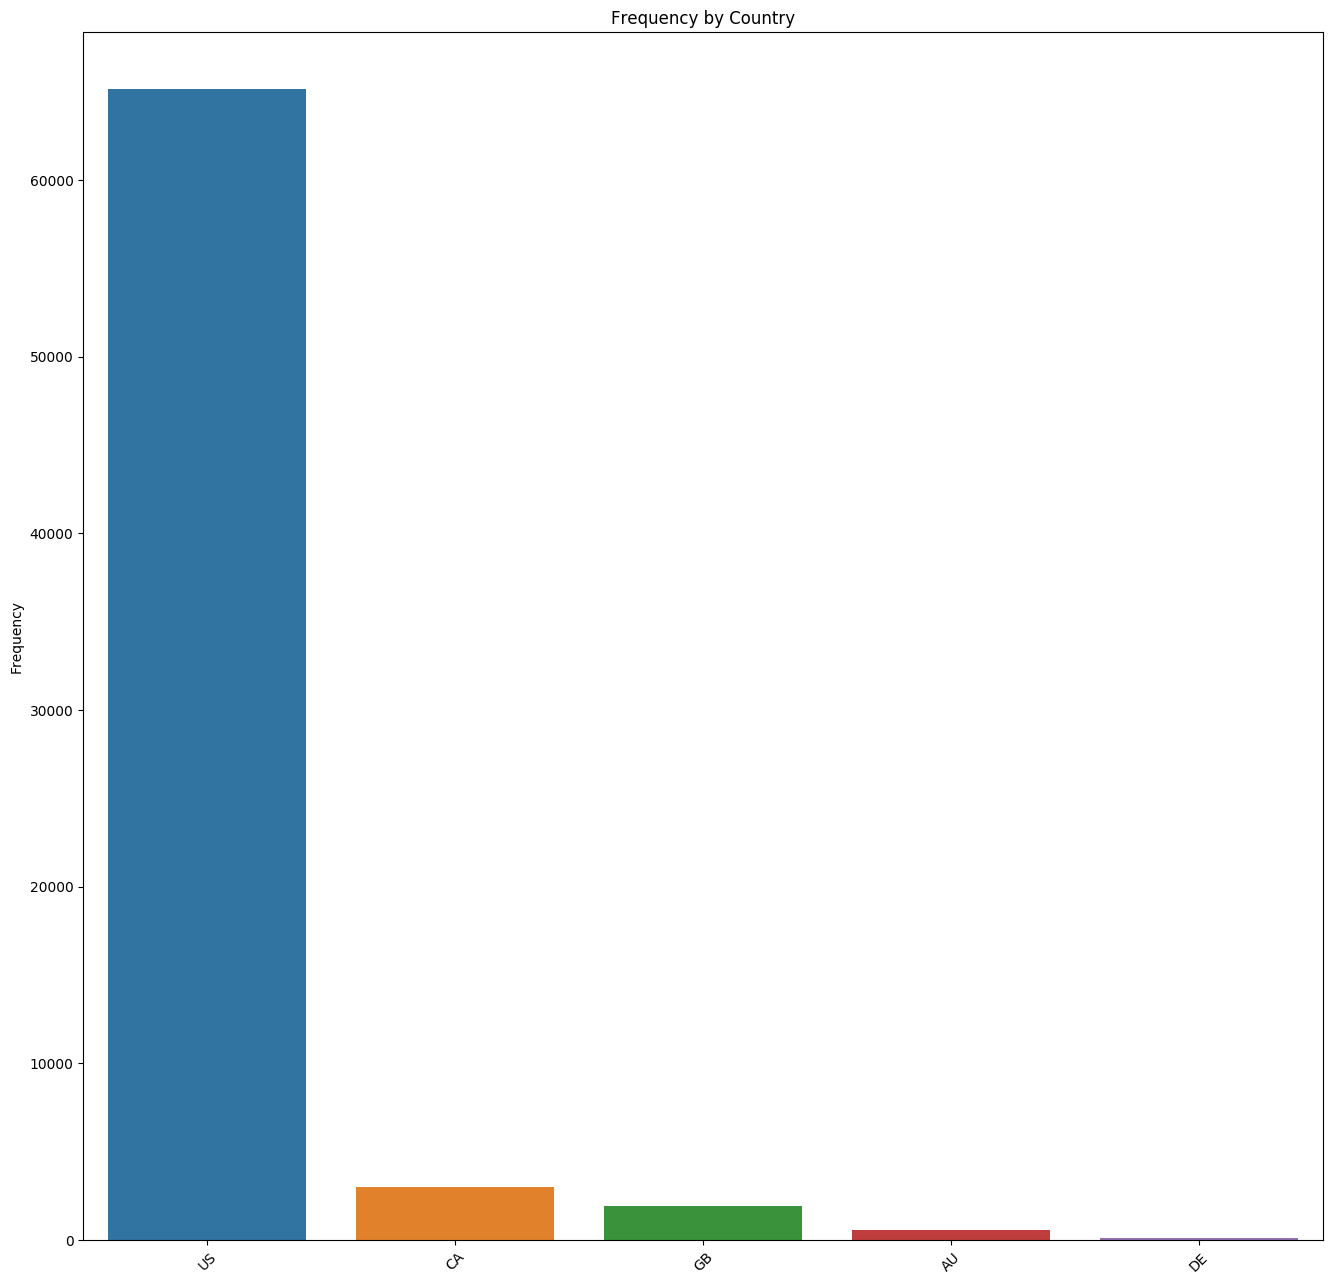

In [22]:
plt.figure(figsize=(16, 16), dpi=100)

countries = df['country'].value_counts().keys()
countries = list(map(lambda x: x.upper(), countries))
values = df['country'].value_counts().values

by_country = sns.barplot(countries, values)
plt.setp(by_country.get_xticklabels(), rotation=45)

plt.title('Frequency by Country')
plt.ylabel('Frequency')
plt.show()

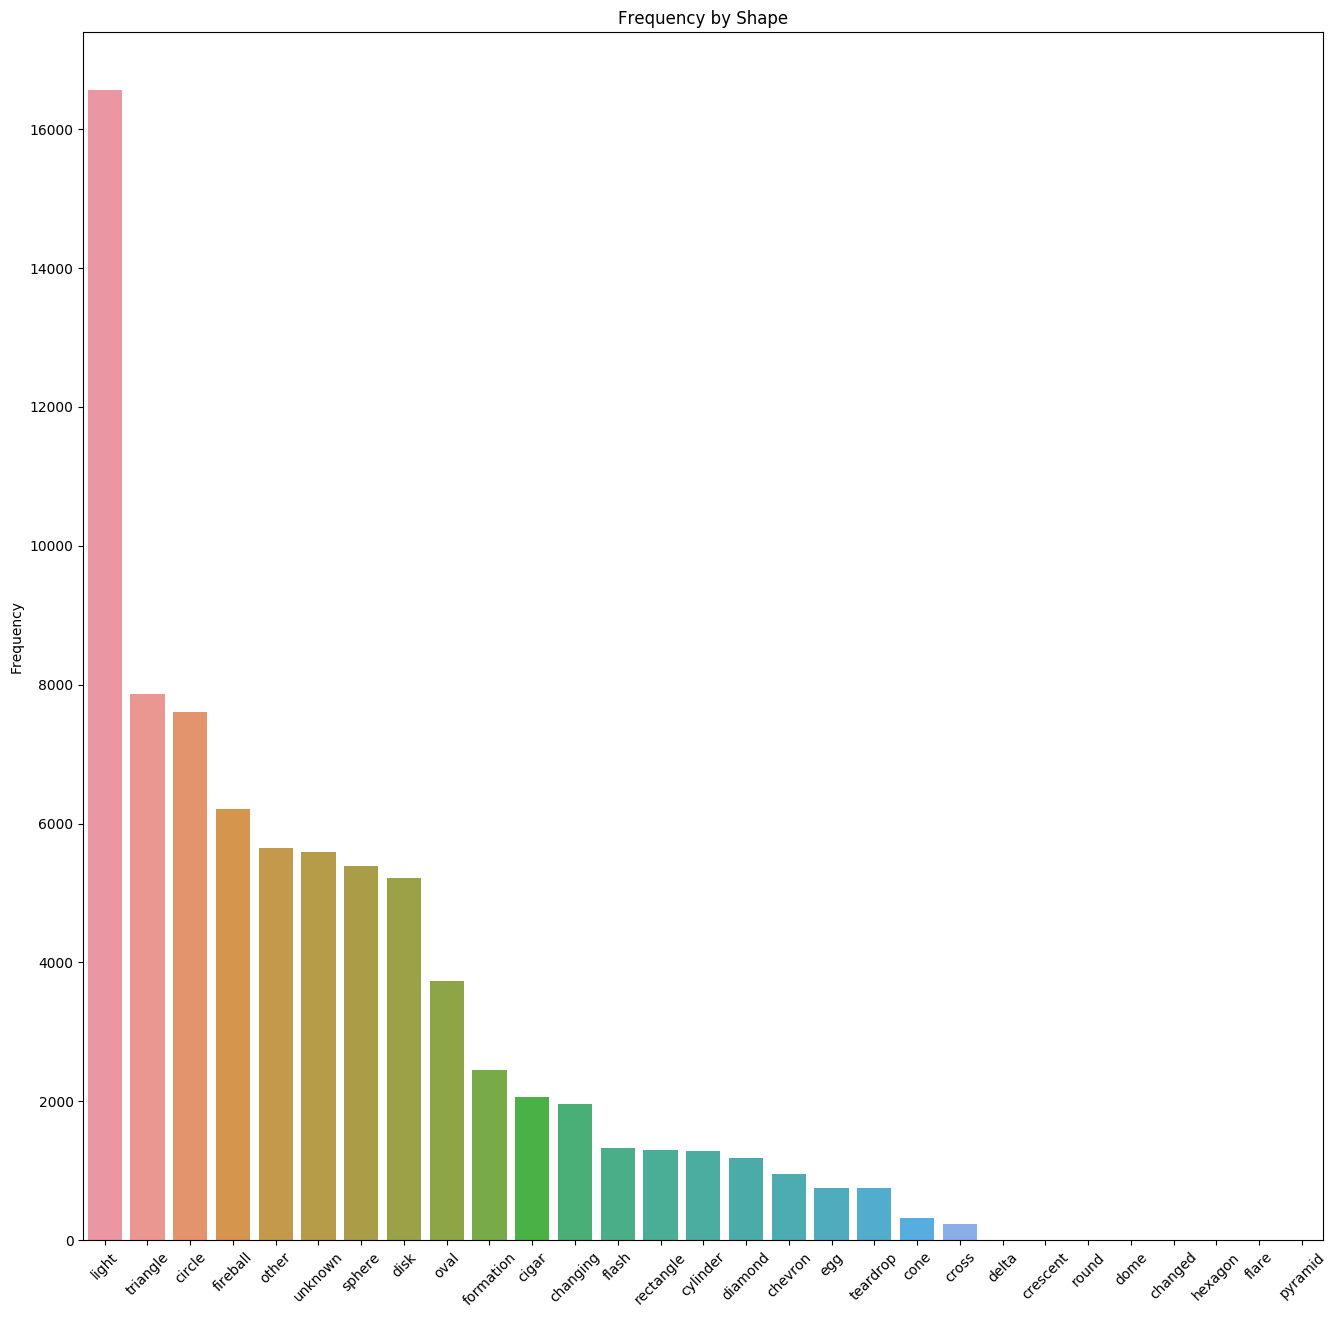

In [23]:
plt.figure(figsize=(16, 16), dpi=100)

shape = df['shape'].value_counts().keys()
values = df['shape'].value_counts().values

by_shape = sns.barplot(shape, values)
plt.setp(by_shape.get_xticklabels(), rotation=45)

plt.title('Frequency by Shape')
plt.ylabel('Frequency')
plt.show()

In [24]:
# There are three irregular inputs
duration = []
for du in df['duration (seconds)']:
    try:
        duration.append(float(du))
    except:
        print(du)
        duration.append(float(du[:-1]))
    
df['duration (seconds)'] = duration

2`
8`
0.5`


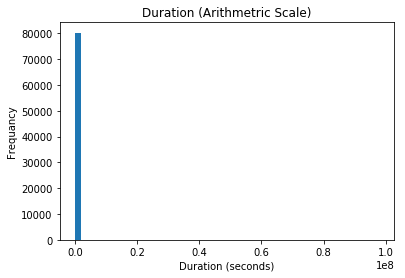

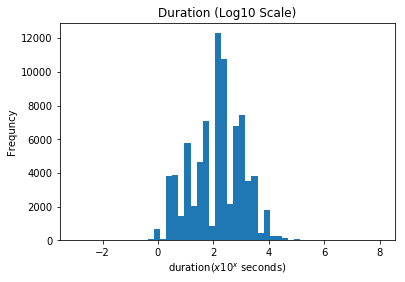

In [25]:
plt.hist(df['duration (seconds)'], bins=50)
plt.title('Duration (Arithmetric Scale)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequancy')
plt.show()

plt.hist(np.log10(df['duration (seconds)']), bins=50)
plt.title('Duration (Log10 Scale)')
plt.ylabel('Frequncy')
plt.xlabel('duration($x 10^x$ seconds)')
plt.show()

In [26]:
# convert format of "datetime" column (string -> datetime object)
# datetime object is easy to use
# change "24:00" to "0:00 (next date)" so that datetime object fits

new_datetime = []

for date in df['datetime']:
    if date[-5:-3] == '24':
        date = date[:-5] + '0' + date[-3:]
        date = datetime.strptime(date, '%m/%d/%Y %H:%M') + timedelta(days=1)
    else:
        date = datetime.strptime(date, '%m/%d/%Y %H:%M')
    
    new_datetime.append(date)

df['datetime'] = new_datetime

In [27]:
new_posted = []

for date in df['date posted']:
    date = datetime.strptime(date, '%m/%d/%Y')
    new_posted.append(date)
    
df['date posted'] = new_posted

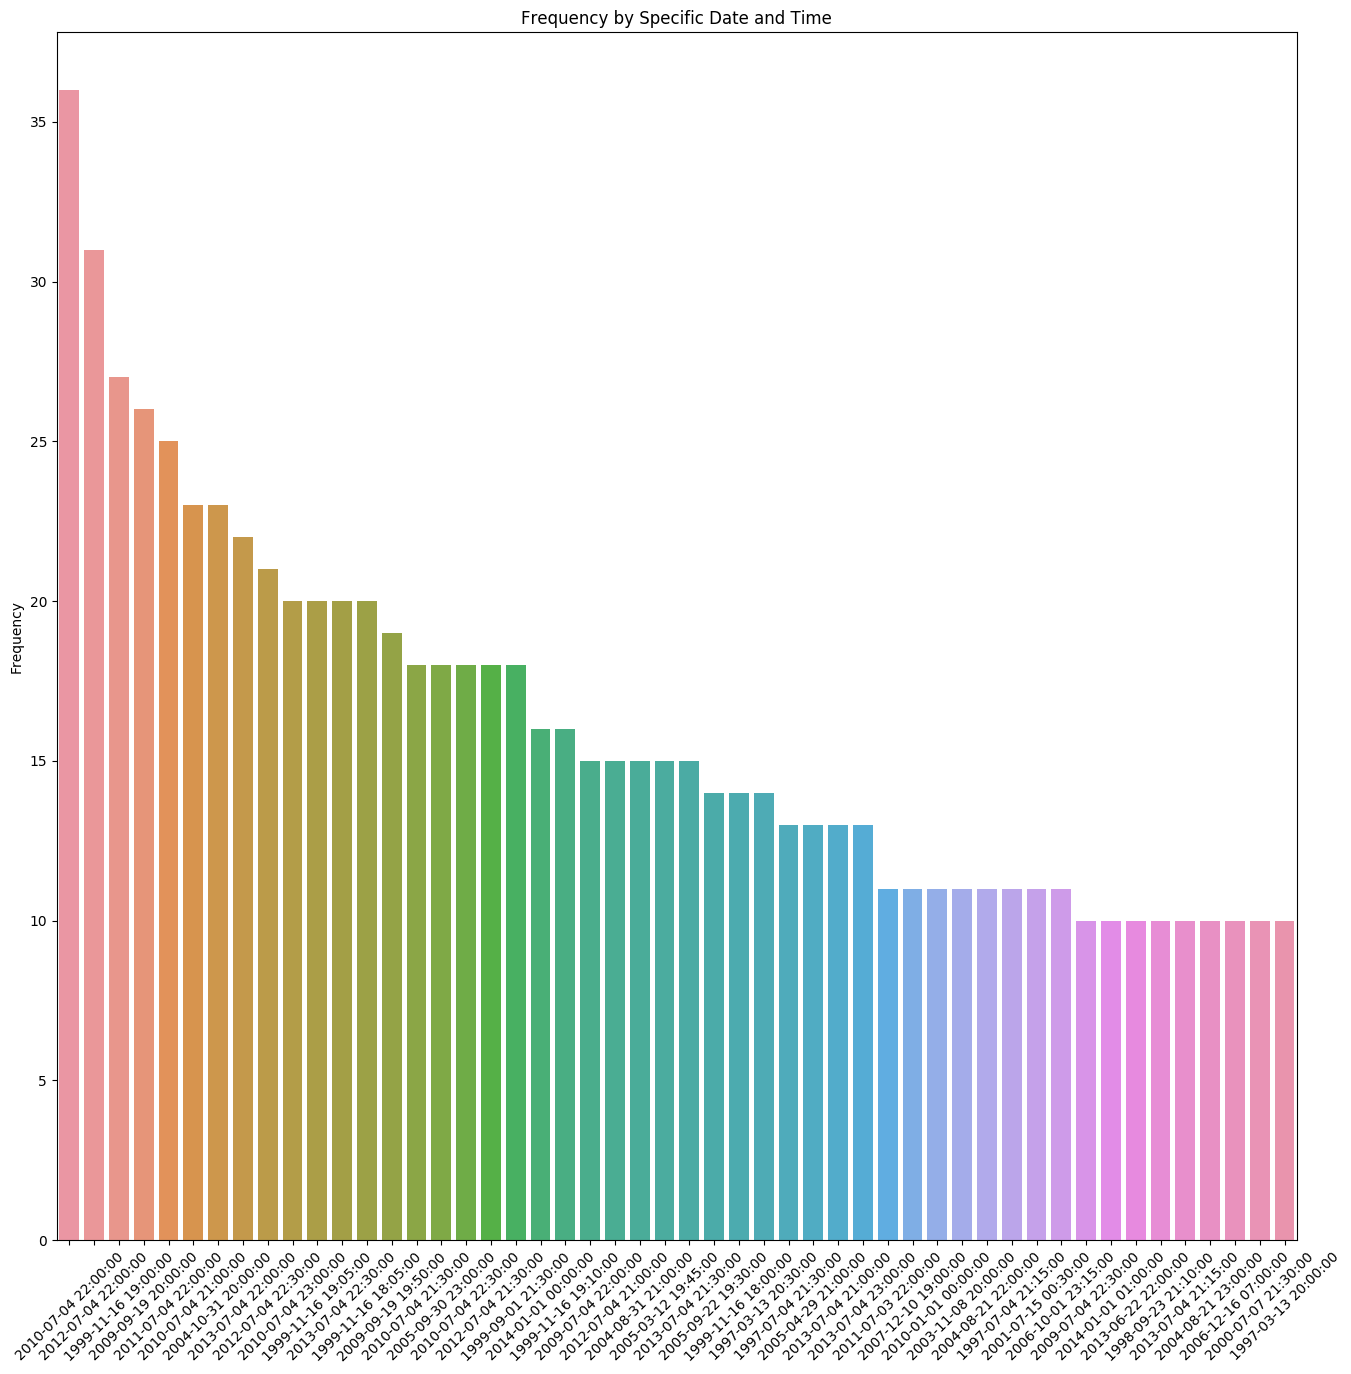

In [28]:
plt.figure(figsize=(16, 16), dpi=100)

dt = df['datetime'].value_counts().keys()[:50]
values = df['datetime'].value_counts().values[:50]

by_dt = sns.barplot(list(dt), values)
plt.setp(by_dt.get_xticklabels(), rotation=45)

plt.title('Frequency by Specific Date and Time')
plt.ylabel('Frequency')
plt.show()

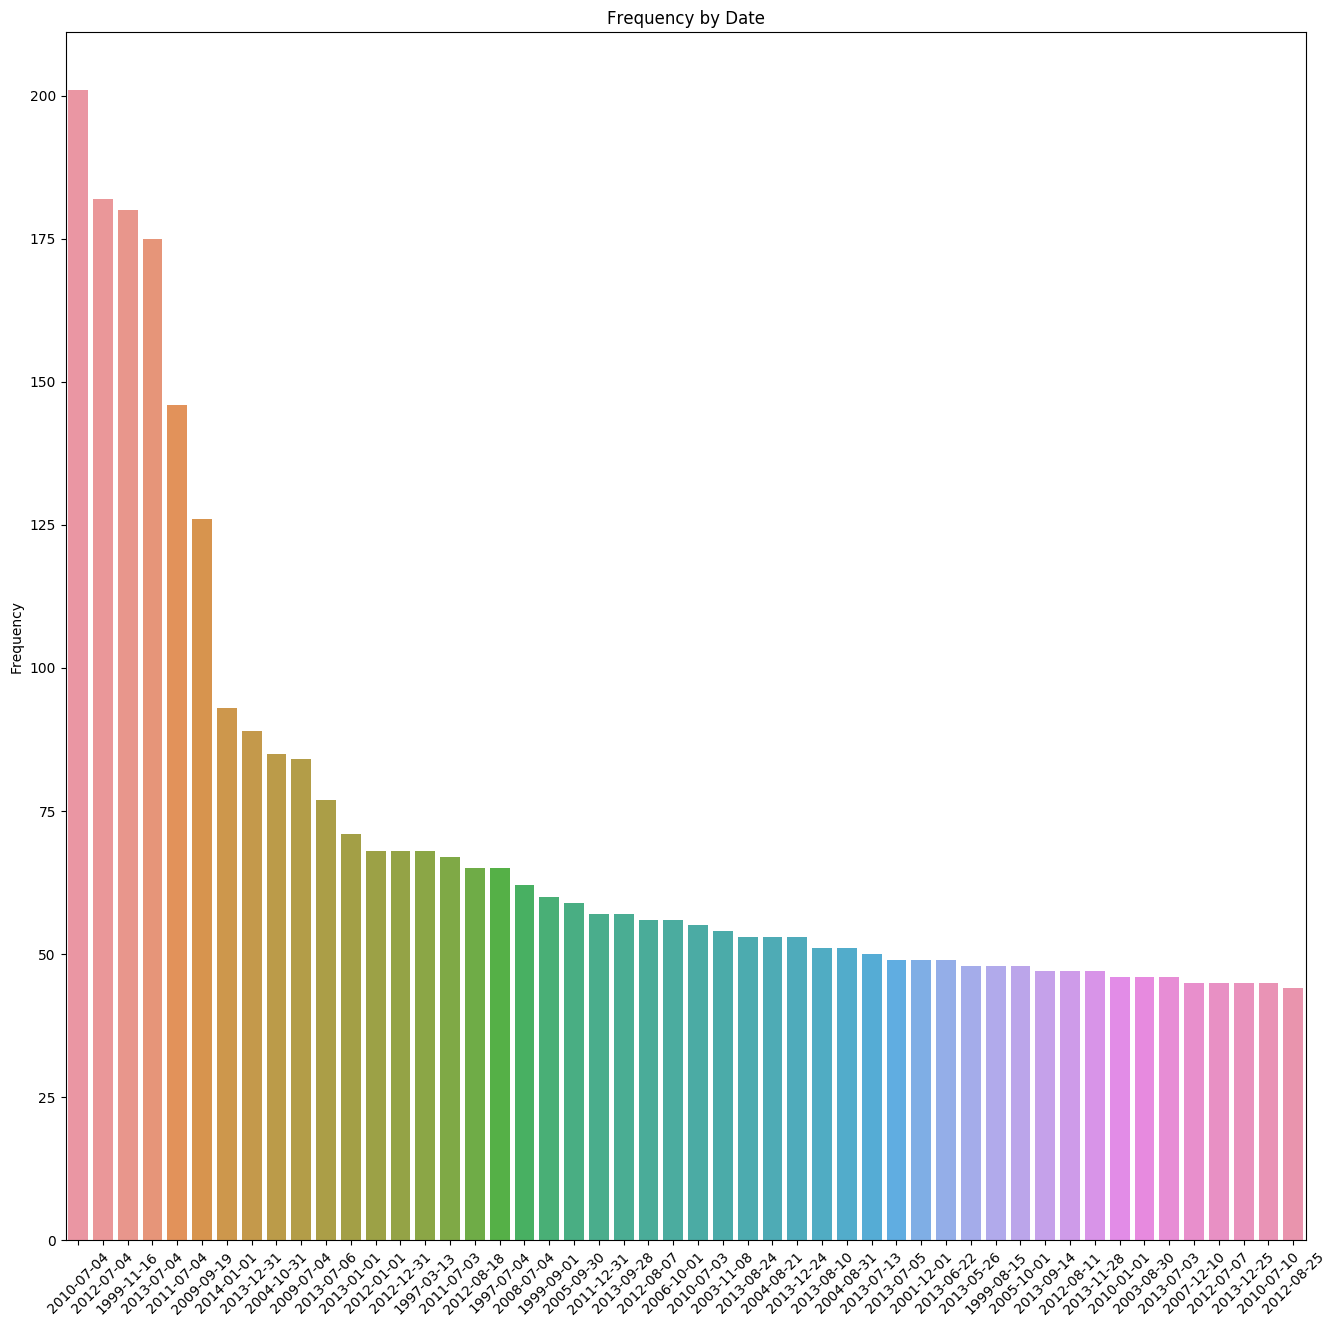

In [29]:
plt.figure(figsize=(16, 16), dpi=100)

dt = []
for date in df['datetime']:
    dt.append(date.date())

df['date'] = dt

dt = df['date'].value_counts().keys()[:50]
values = df['date'].value_counts().values[:50]

by_dt = sns.barplot(dt, values)
plt.setp(by_dt.get_xticklabels(), rotation=45)

plt.title('Frequency by Date')
plt.ylabel('Frequency')
plt.show()

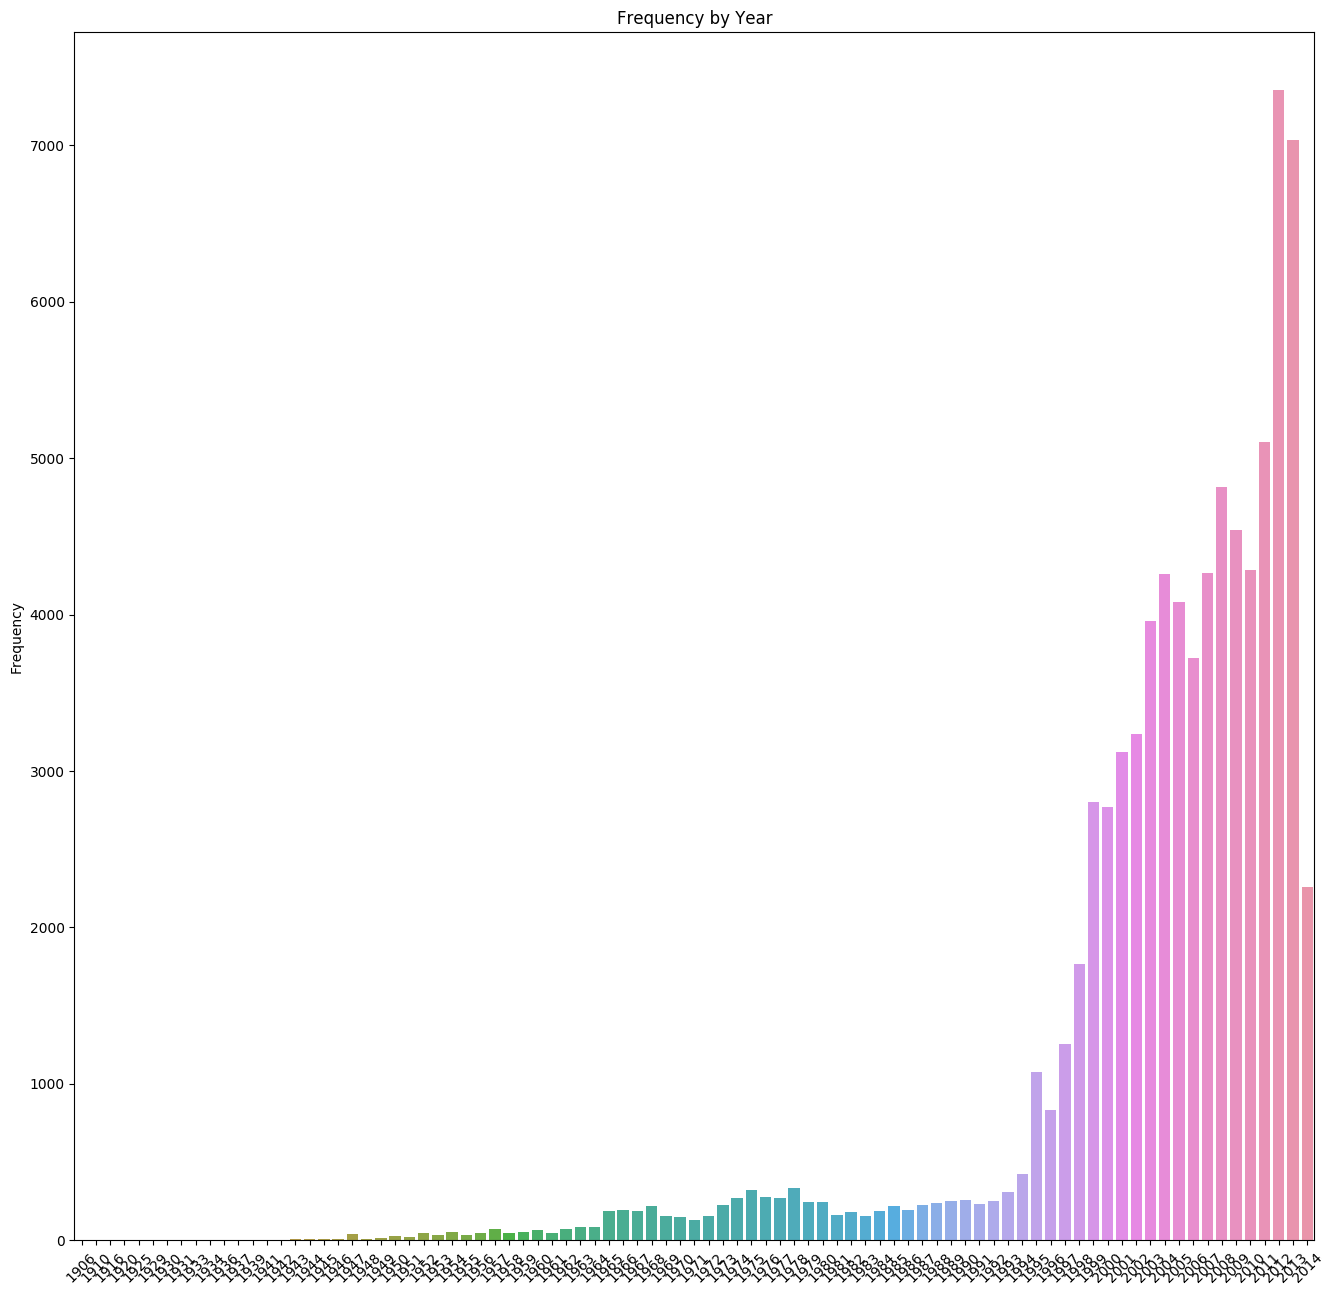

In [30]:
years = []

for date in df['datetime']:
    years.append(date.year)

df['year'] = years

years = pd.Series(years).value_counts()

years_ = years.keys()
values = years.values

plt.figure(figsize=(16, 16), dpi=100)
by_y = sns.barplot(years_, values)
plt.setp(by_y.get_xticklabels(), rotation=45)

plt.title('Frequency by Year')
plt.ylabel('Frequency')
plt.show()

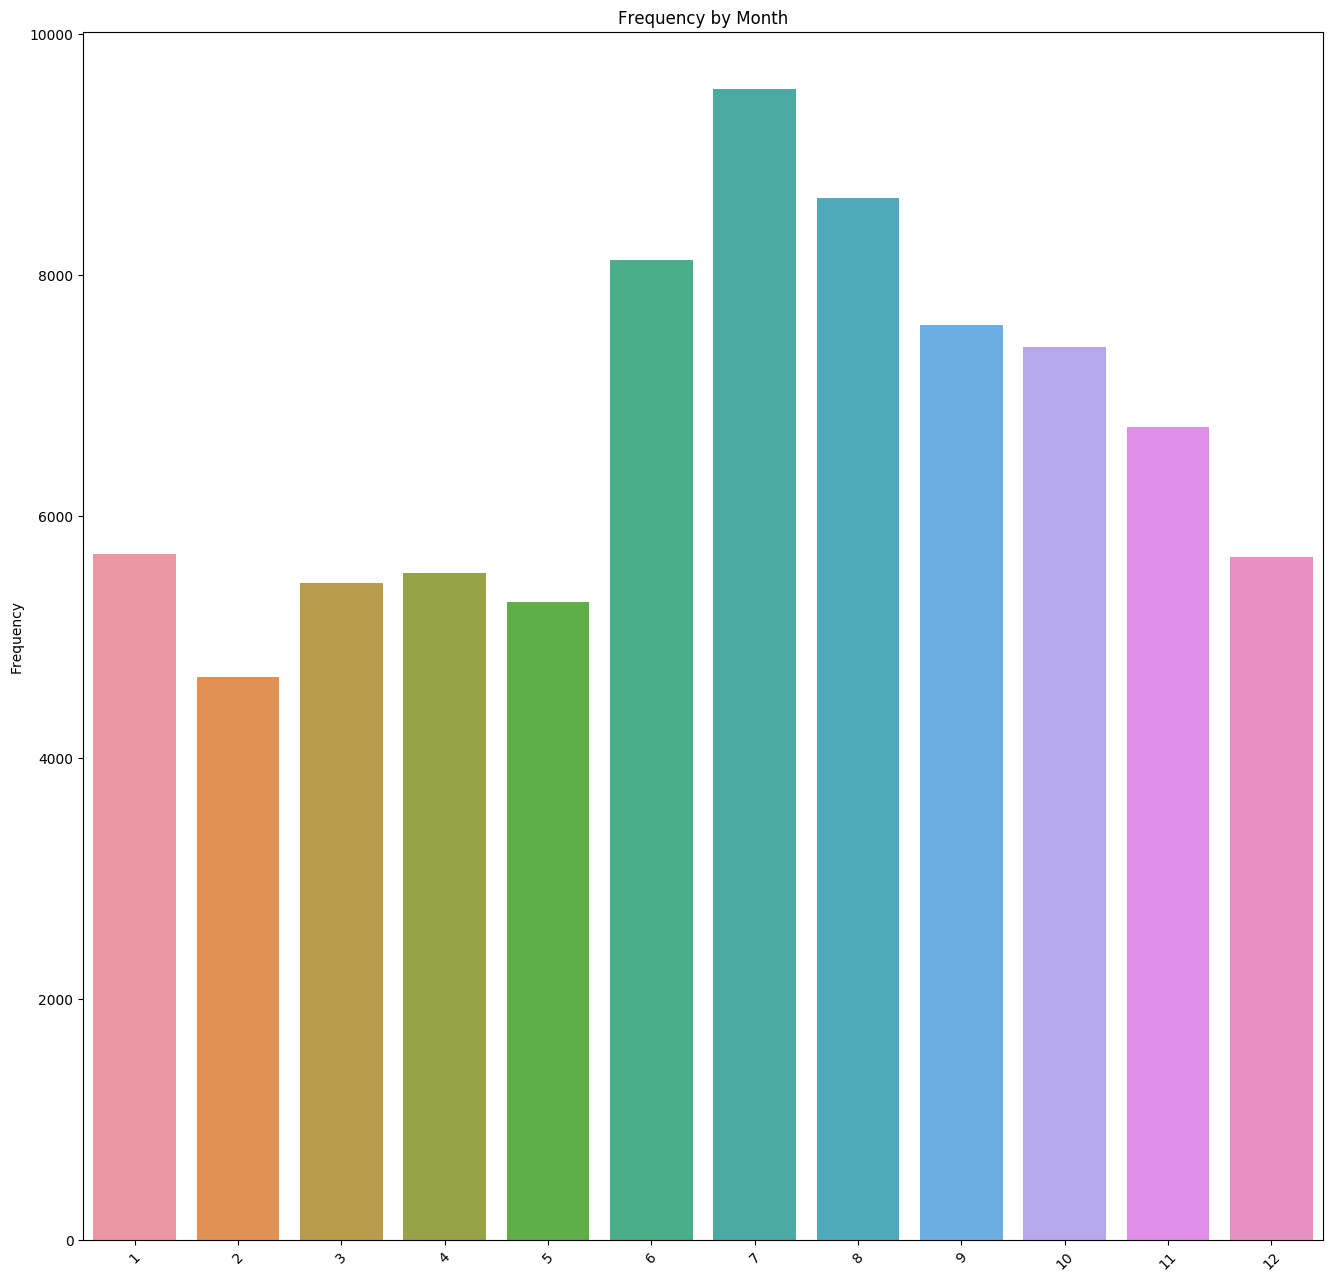

In [31]:
months = []

for date in df['datetime']:
    months.append(date.month)
    
df['month'] = months

months = pd.Series(months).value_counts()

months_ = months.keys()
values = months.values

plt.figure(figsize=(16, 16), dpi=100)
by_m = sns.barplot(months_, values)
plt.setp(by_m.get_xticklabels(), rotation=45)

plt.title('Frequency by Month')
plt.ylabel('Frequency')
plt.show()

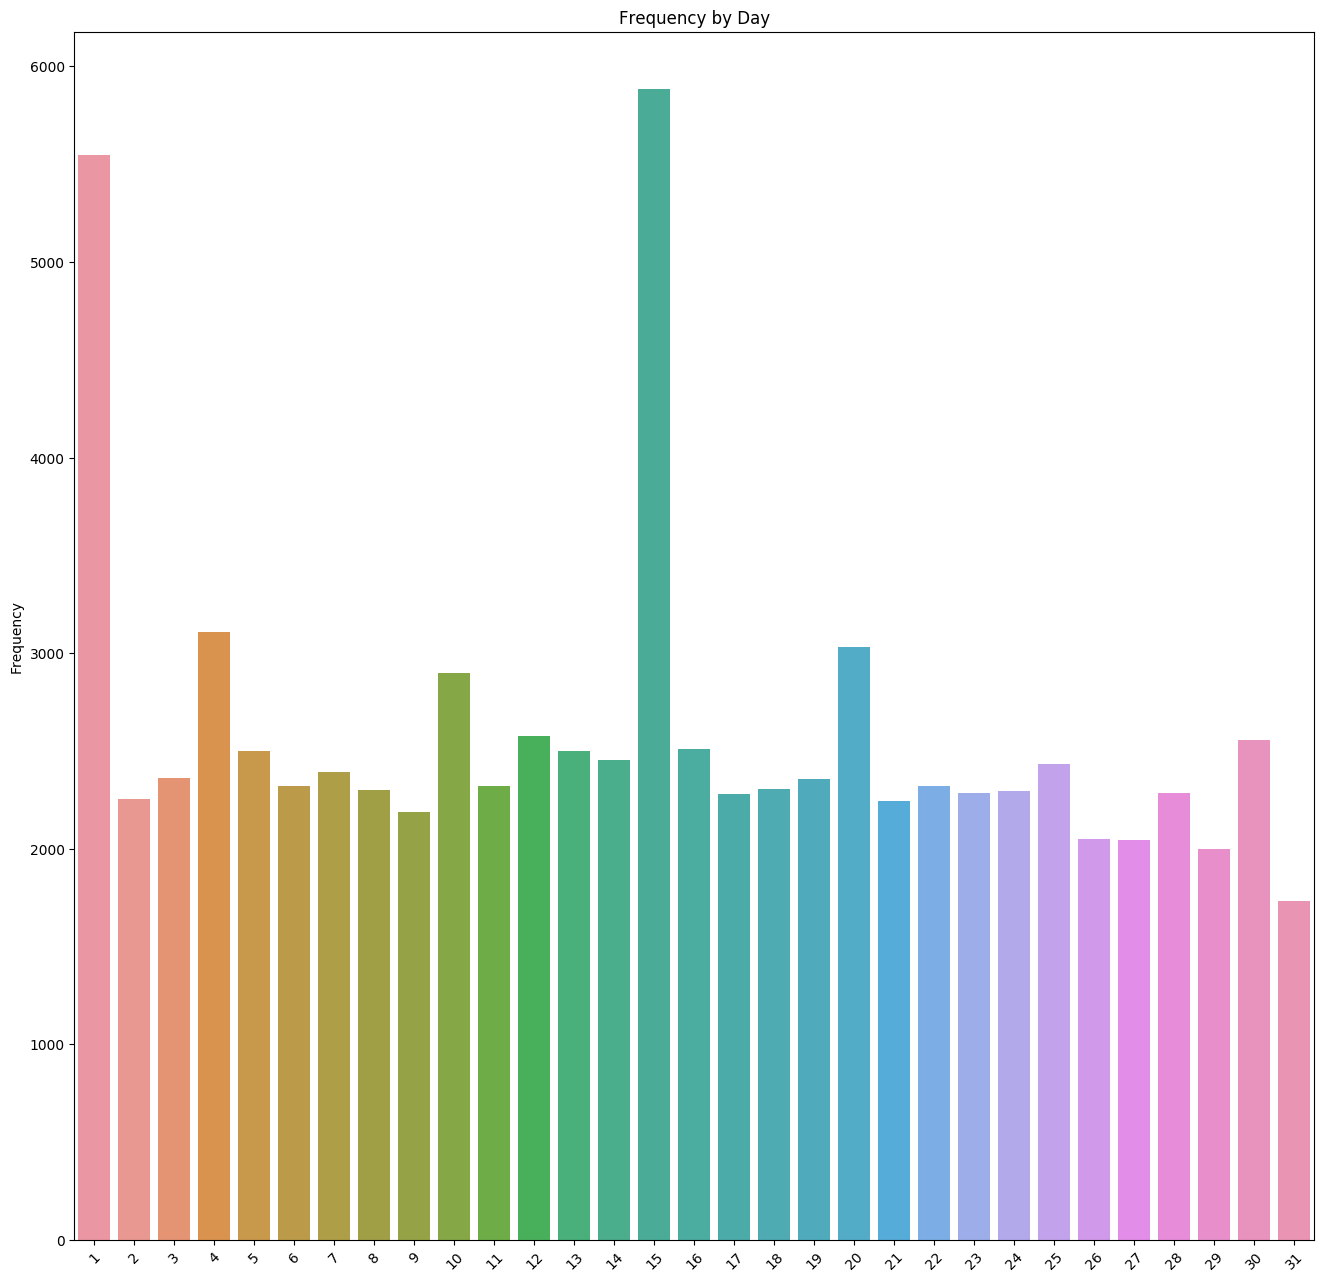

In [32]:
days = []

for date in df['datetime']:
    days.append(date.day)
    
df['day'] = days

days = pd.Series(days).value_counts()

days_ = days.keys()
values = days.values

plt.figure(figsize=(16, 16), dpi=100)
by_d = sns.barplot(days_, values)
plt.setp(by_d.get_xticklabels(), rotation=45)

plt.title('Frequency by Day')
plt.ylabel('Frequency')
plt.show()

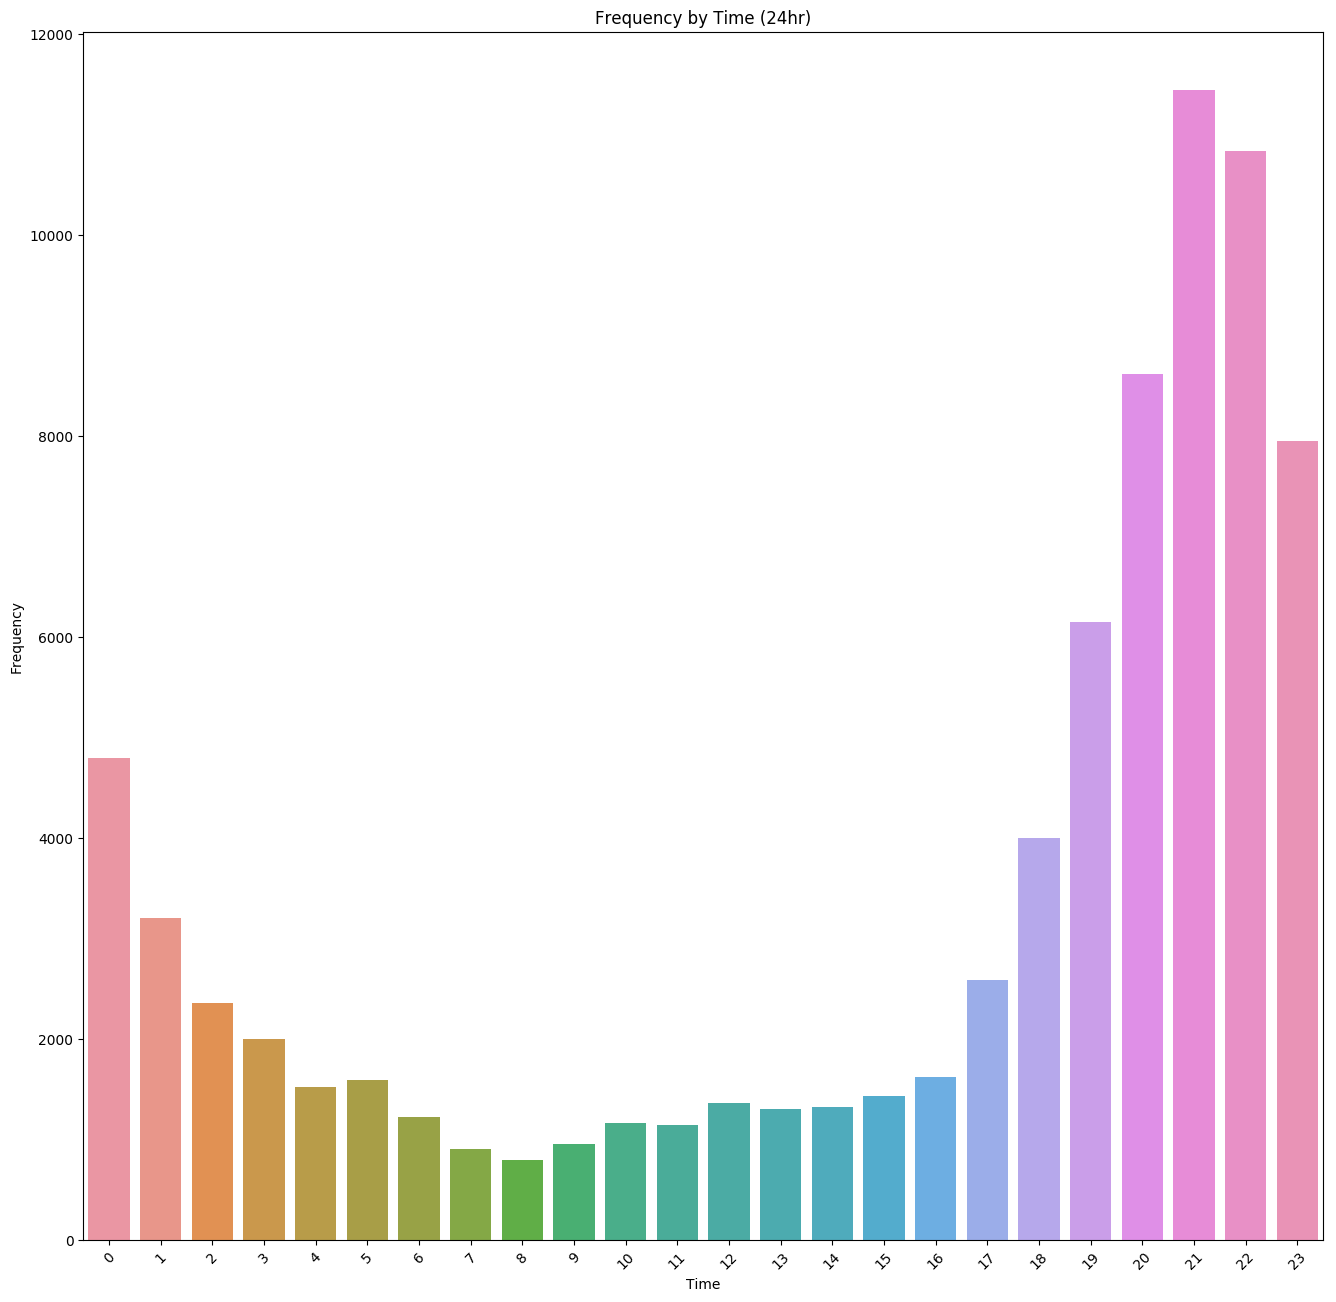

In [33]:
hours = []

for date in df['datetime']:
    hours.append(date.hour)

df['time'] = hours

hours = pd.Series(hours).value_counts()

hours_ = hours.keys()
values = hours.values

plt.figure(figsize=(16, 16), dpi=100)
by_h = sns.barplot(hours_, values)
plt.setp(by_h.get_xticklabels(), rotation=45)

plt.title('Frequency by Time (24hr)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# 2D Visualization

In [34]:
df['count'] = [1]*len(df)

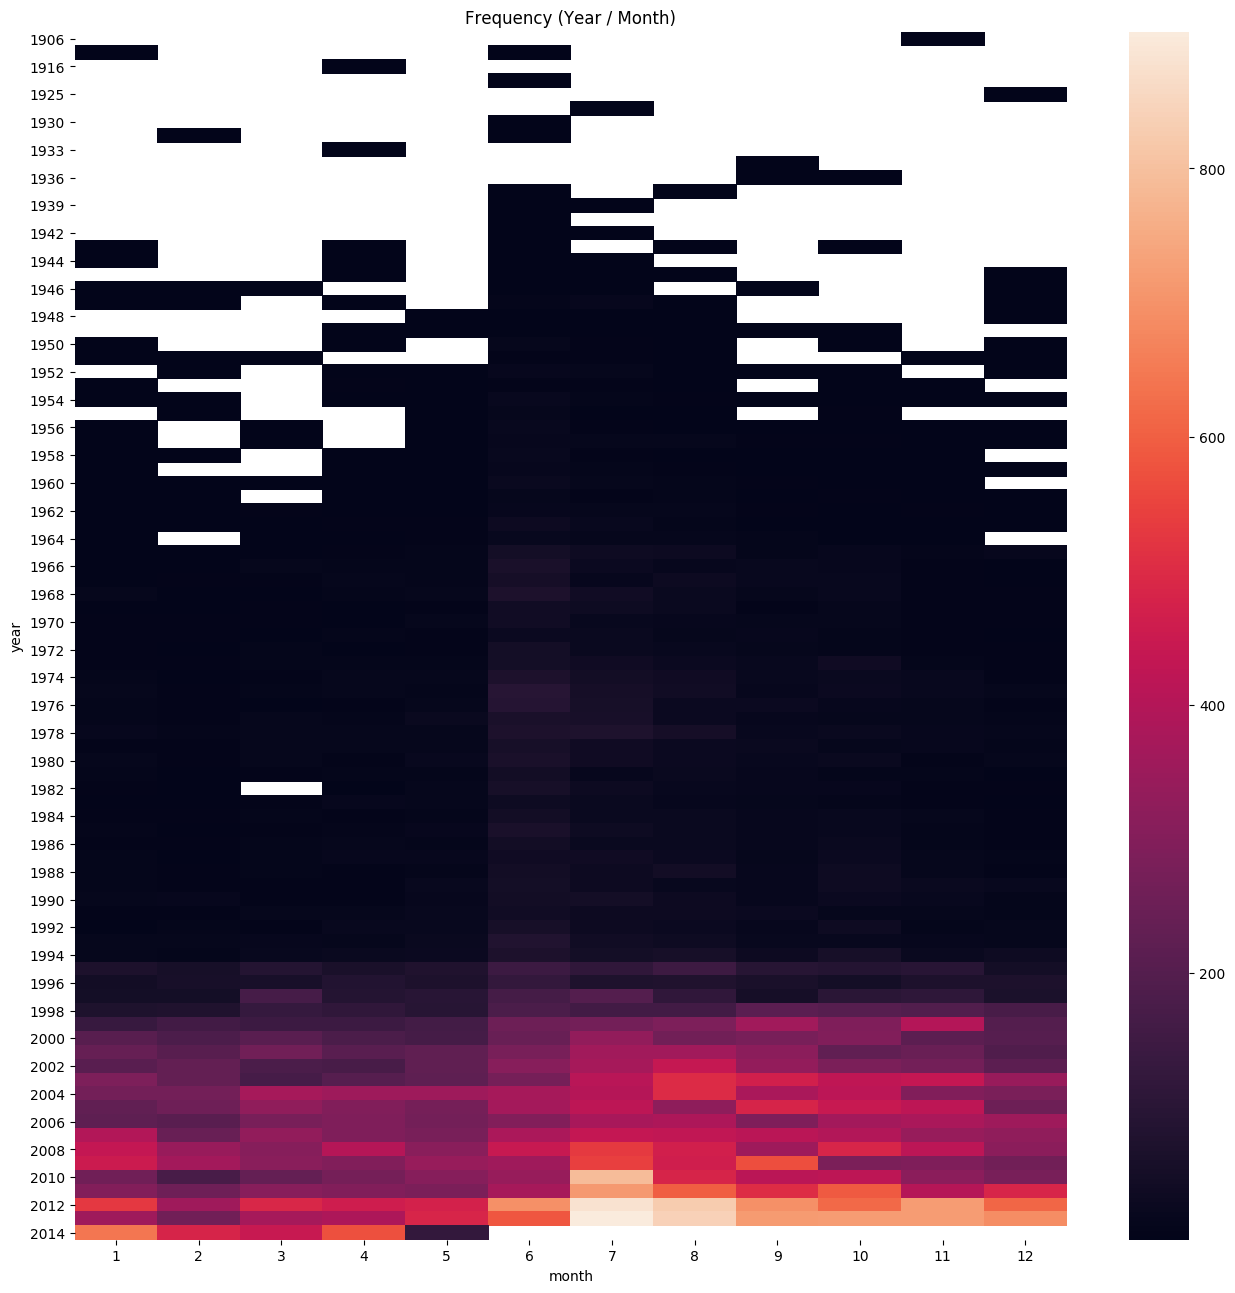

In [35]:
year_month = pd.pivot_table(df, index='year', columns='month', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(year_month)

plt.title('Frequency (Year / Month)')
plt.show()

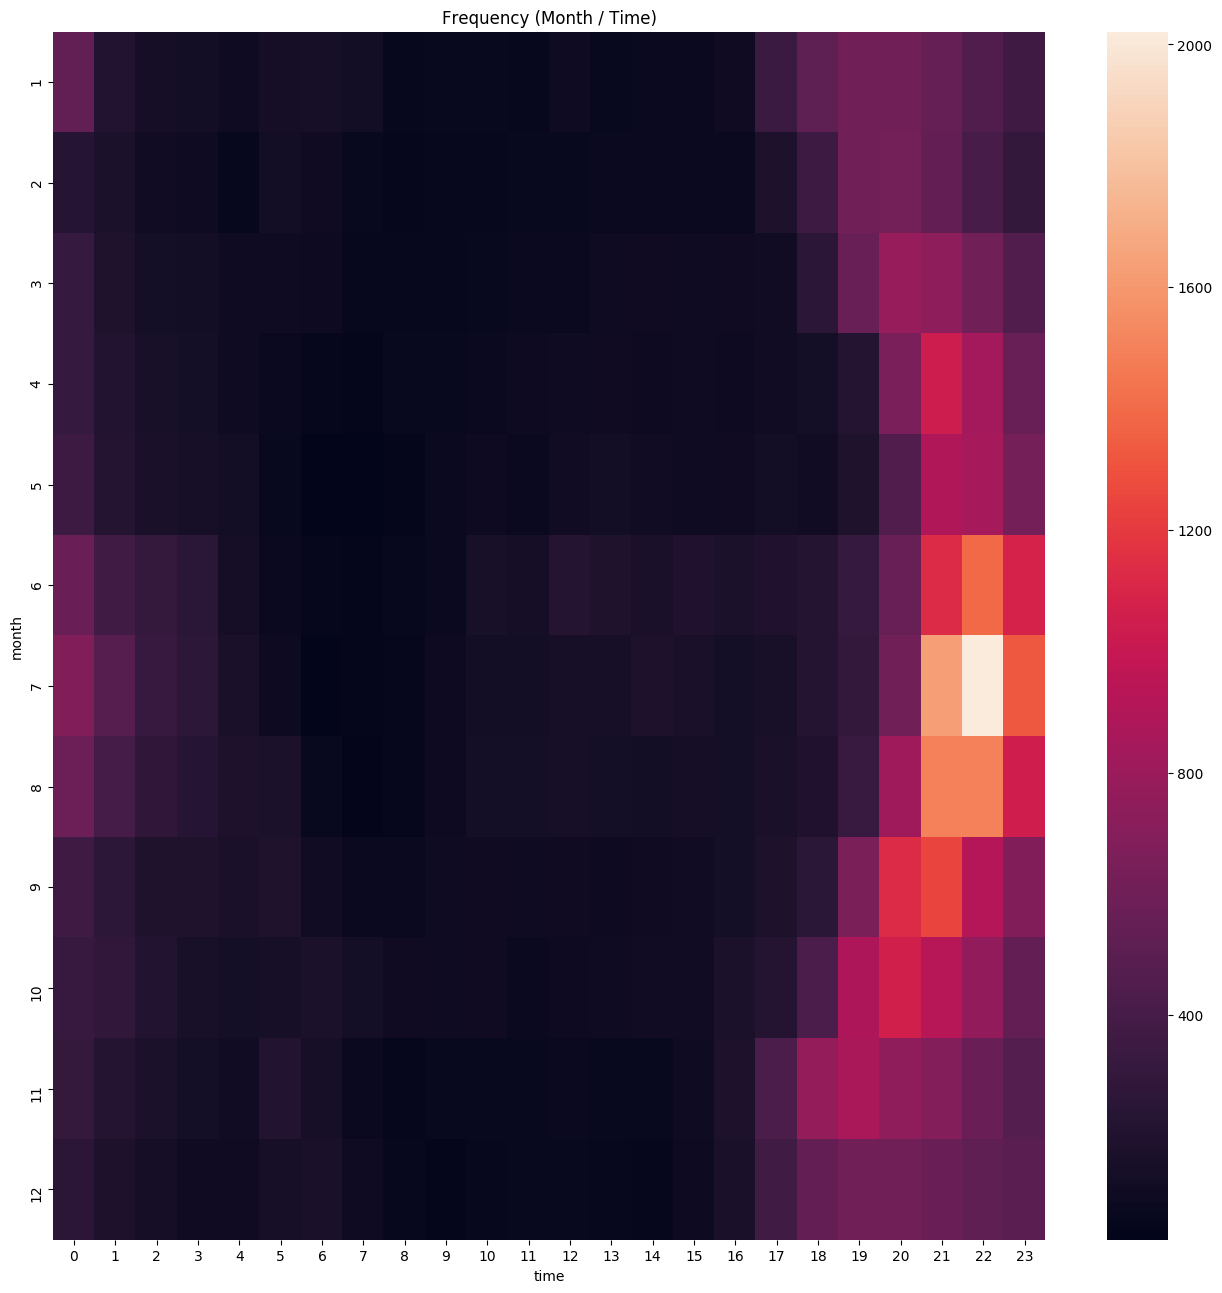

In [36]:
month_time = pd.pivot_table(df, index='month', columns='time', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(month_time)

plt.title('Frequency (Month / Time)')
plt.show()

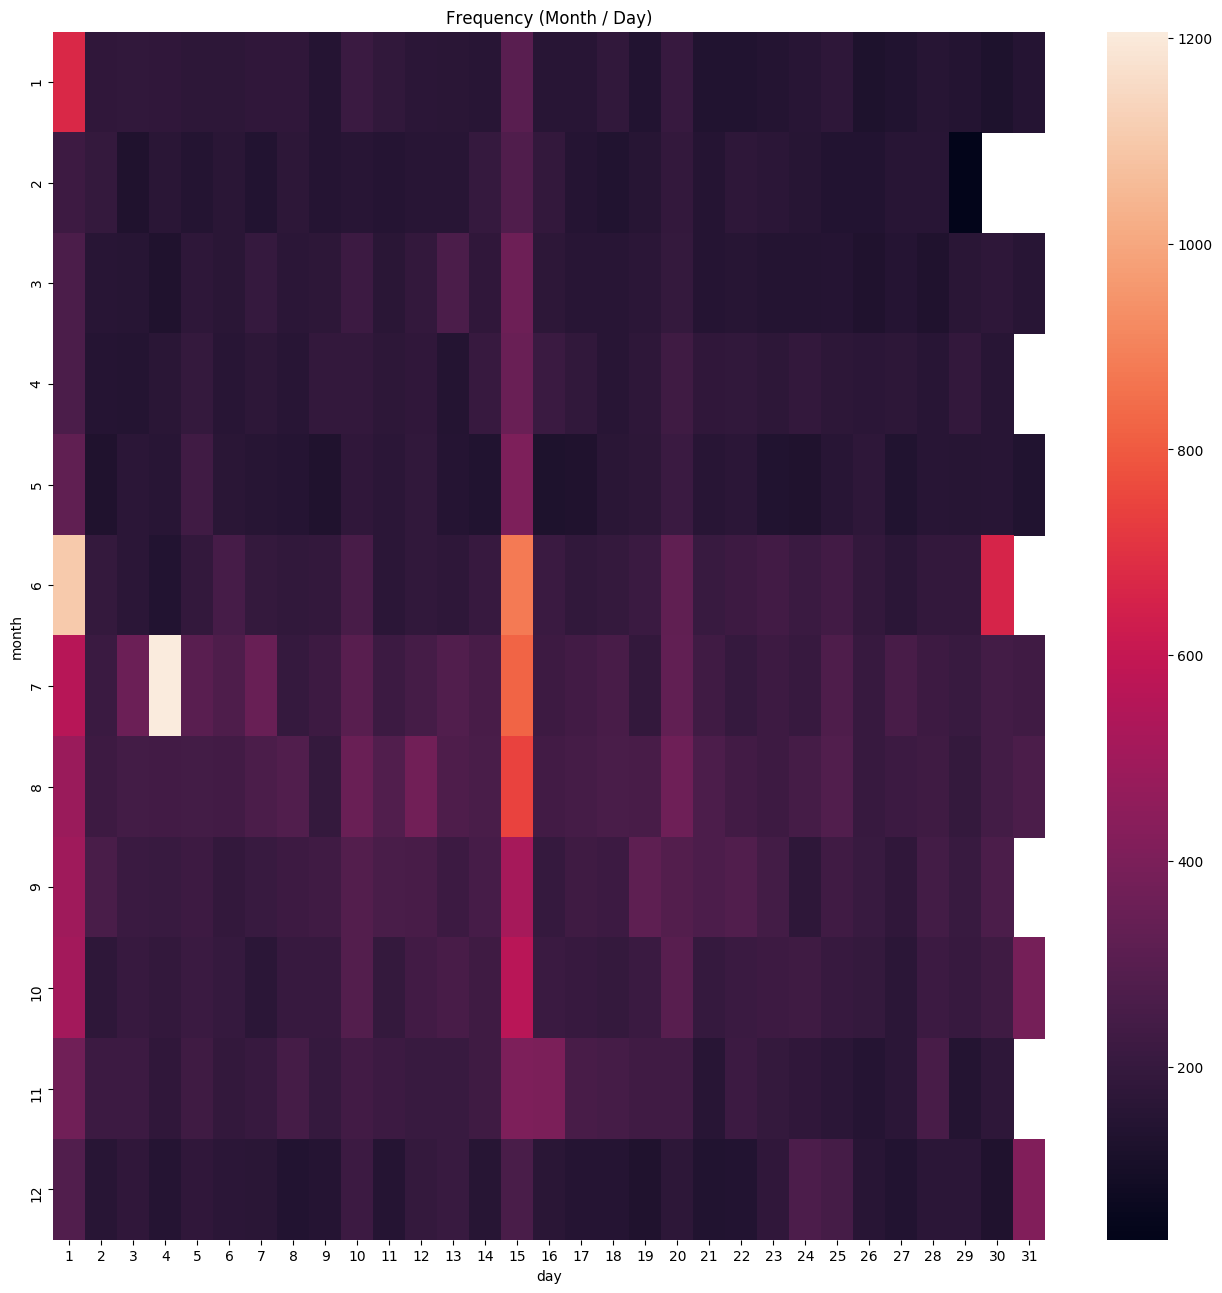

In [37]:
month_day = pd.pivot_table(df, index='month', columns='day', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(month_day)

plt.title('Frequency (Month / Day)')
plt.show()

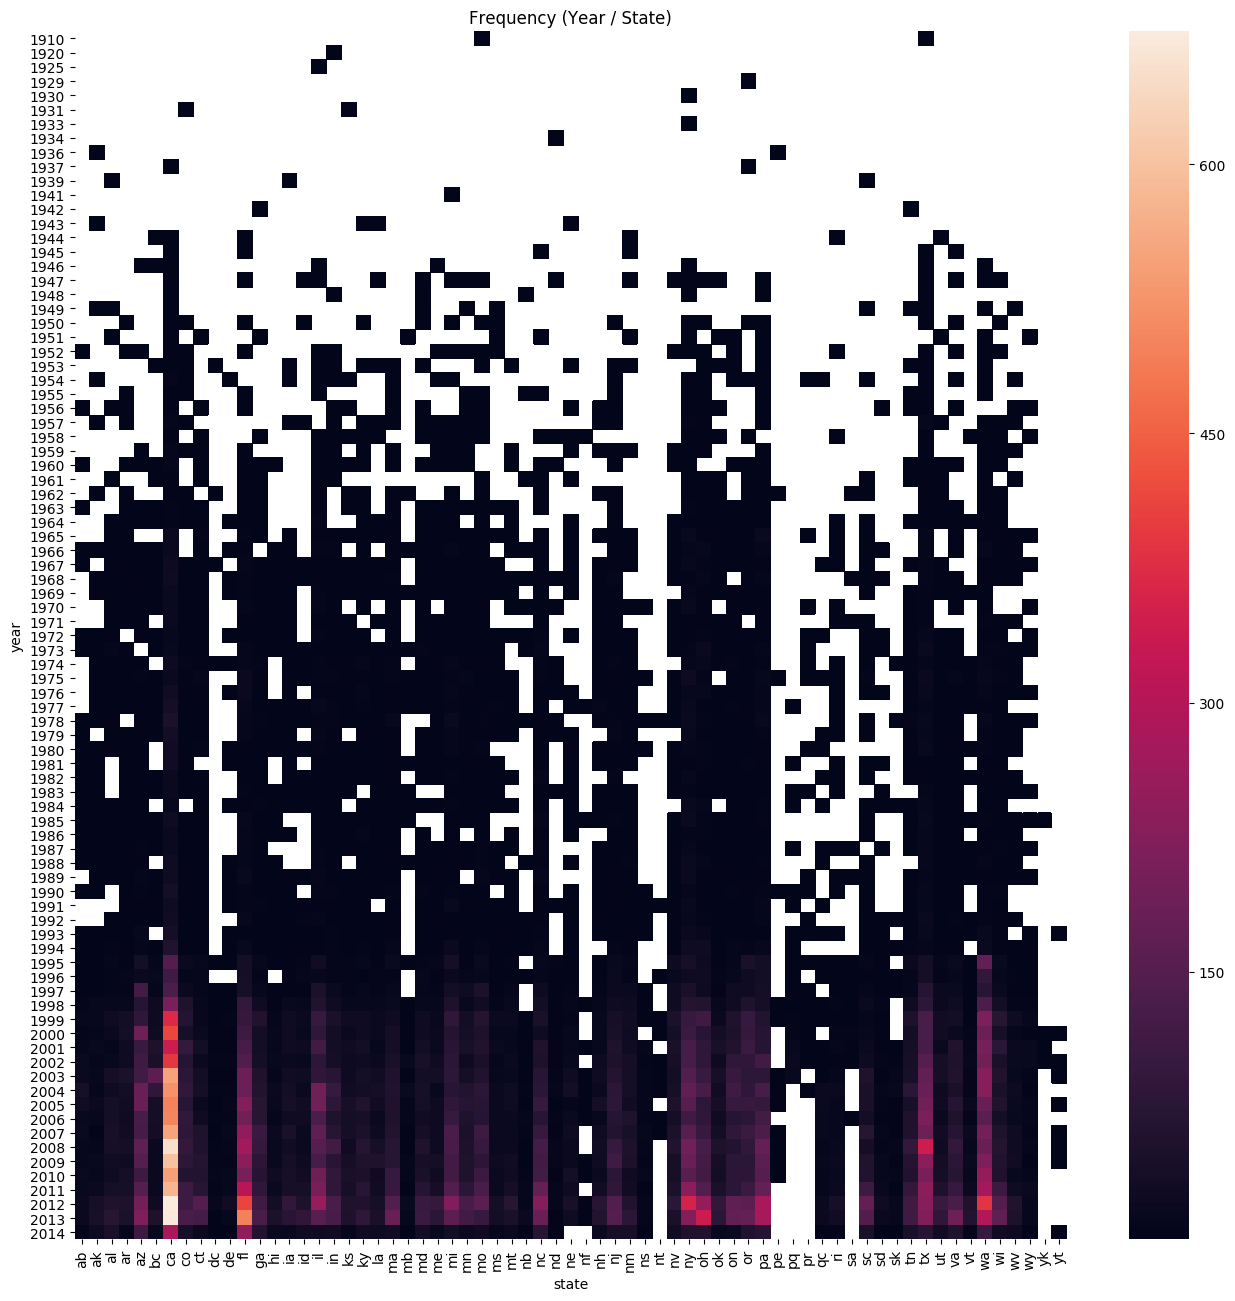

In [38]:
year_state = pd.pivot_table(df, index='year', columns='state', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(year_state)

plt.title('Frequency (Year / State)')
plt.show()

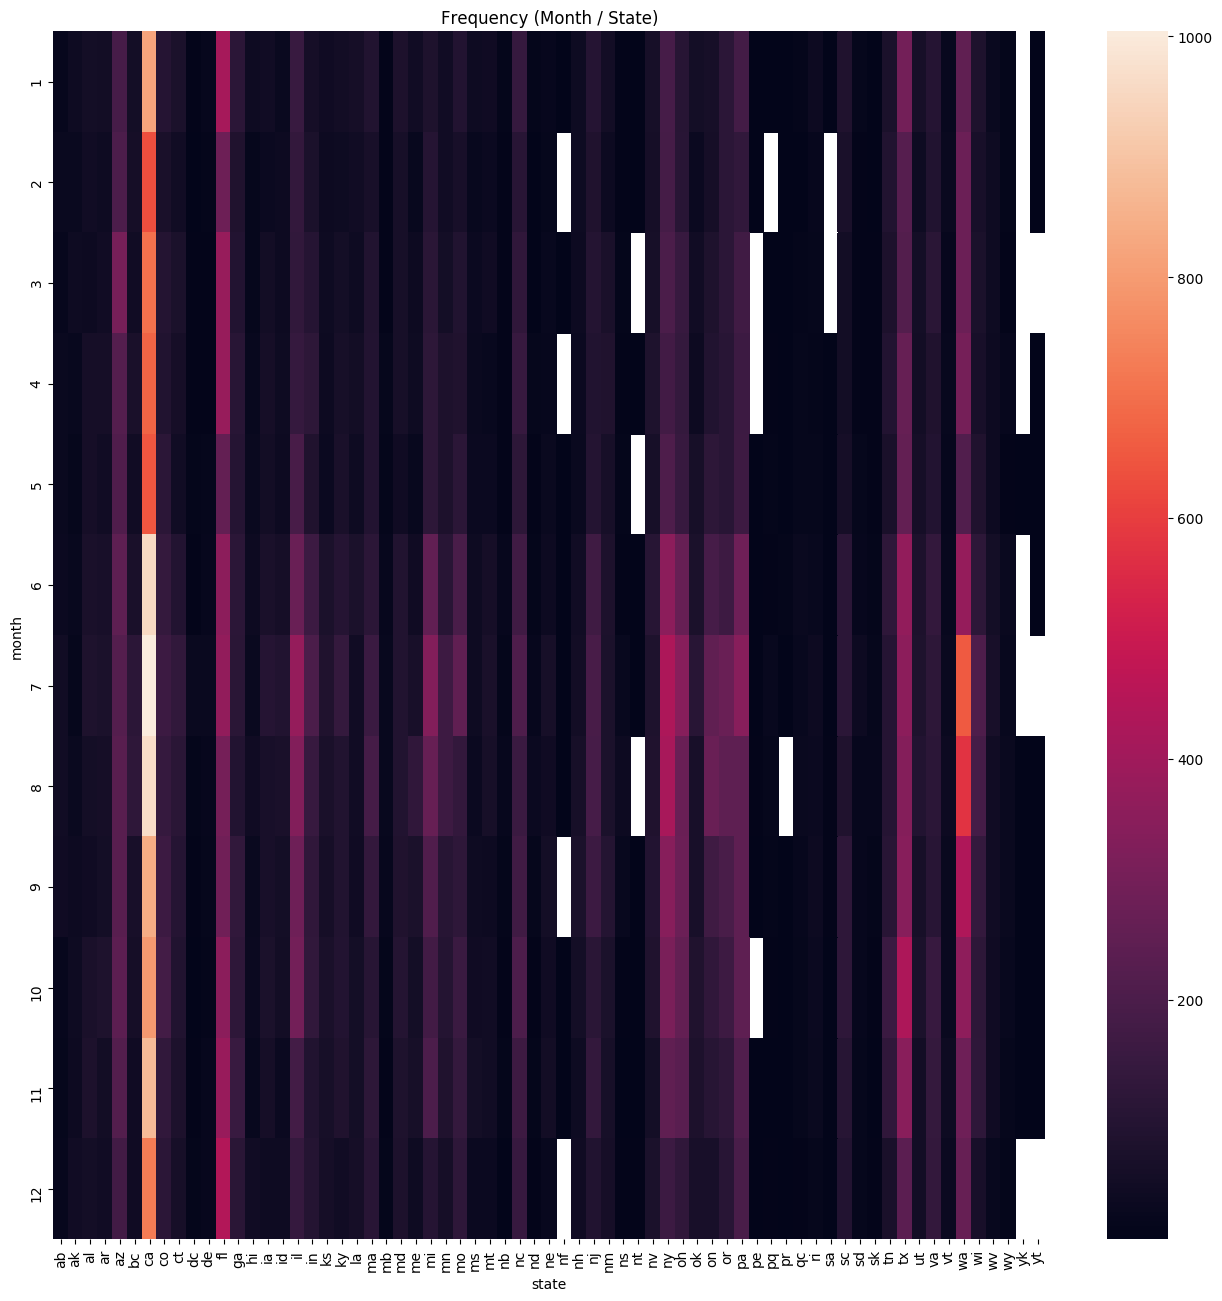

In [39]:
month_state = pd.pivot_table(df, index='month', columns='state', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(month_state)

plt.title('Frequency (Month / State)')
plt.show()

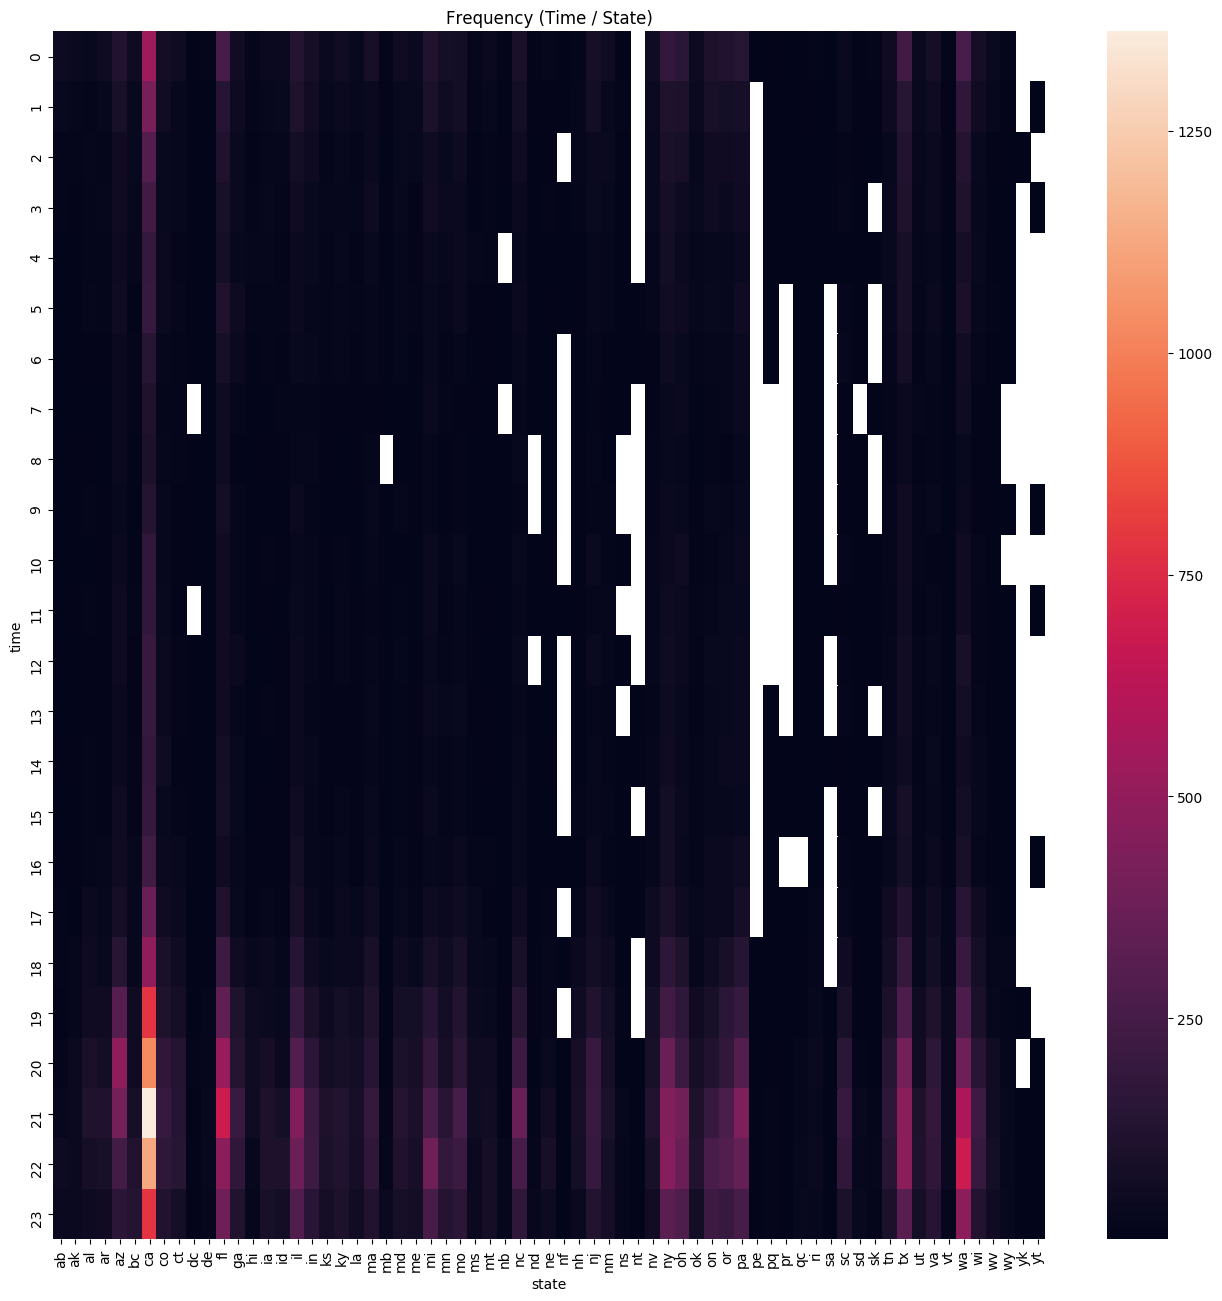

In [40]:
time_state = pd.pivot_table(df, index='time', columns='state', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(time_state)

plt.title('Frequency (Time / State)')
plt.show()

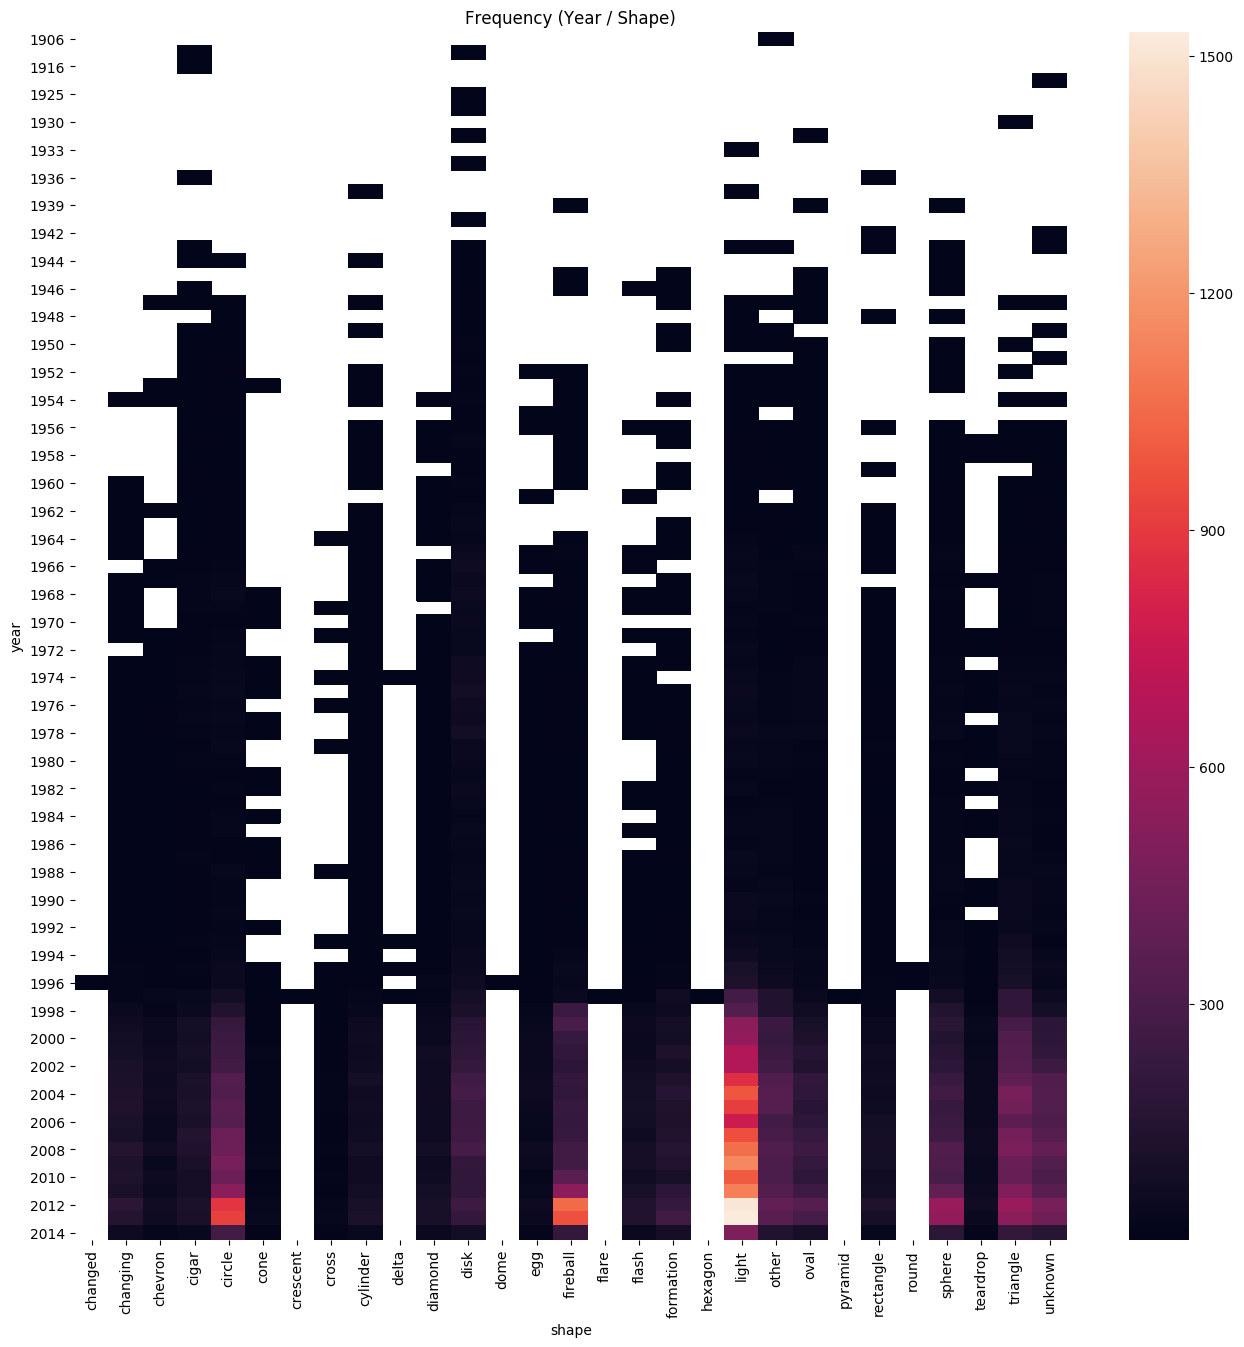

In [41]:
year_shape = pd.pivot_table(df, index='year', columns='shape', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(year_shape)

plt.title('Frequency (Year / Shape)')
plt.show()

# San Diego

In [42]:
df_sd = df[df['city'] == 'san diego']
df_sd.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,"city, state",date,year,month,day,time,count
30,1979-10-10 22:00:00,san diego,ca,us,oval,180.0,3 minutes,My 2nd UFO sighting&#44 October 1979,2001-08-05,32.7152778,-117.156389,"san diego, ca",1979-10-10,1979,10,10,22,1
85,1999-10-10 11:00:00,san diego,ca,us,fireball,3600.0,1 hour,At 10:45 in the morning&#44 my father and I no...,1999-10-19,32.7152778,-117.156389,"san diego, ca",1999-10-10,1999,10,10,11,1
200,2008-10-10 22:00:00,san diego,ca,us,disk,30.0,30 seconds,low flying saucer in suburban area. ((NUFORC ...,2008-10-31,32.7152778,-117.156389,"san diego, ca",2008-10-10,2008,10,10,22,1
248,2012-10-10 18:56:00,san diego,ca,us,sphere,240.0,4 minutes,Single white light or craft passed over and ve...,2012-10-30,32.7152778,-117.156389,"san diego, ca",2012-10-10,2012,10,10,18,1
336,2003-10-11 00:00:00,san diego,ca,us,NaN,172800.0,2 days?,Lost two days awaken to power out tv fried and...,2003-10-31,32.7152778,-117.156389,"san diego, ca",2003-10-11,2003,10,11,0,1


In [43]:
len(df_sd)

338

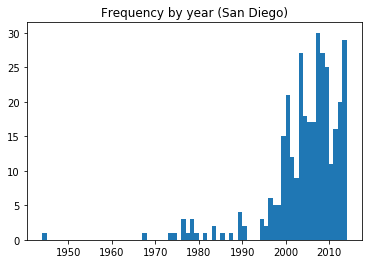

In [44]:
plt.hist(df_sd['year'], bins=70)
plt.title('Frequency by year (San Diego)')
plt.show()

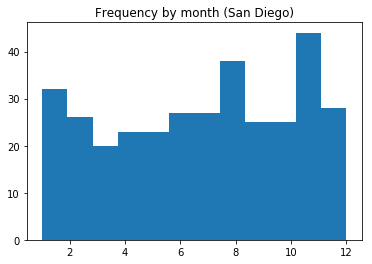

In [45]:
plt.hist(df_sd['month'], bins=12)
plt.title('Frequency by month (San Diego)')
plt.show()

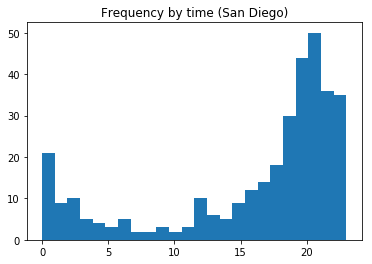

In [46]:
plt.hist(df_sd['time'], bins=24)
plt.title('Frequency by time (San Diego)')
plt.show()

# What happend in July 4 2010?

In [47]:
df20100704 = df[df['datetime'] == datetime(2010, 7, 4, 22, 0)]
df20100704.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,"city, state",date,year,month,day,time,count
62151,2010-07-04 22:00:00,batesville (near lake santee),in,us,fireball,1200.0,20 min,Fireball seen over Lake Santee on July 3&#44 2010,2010-07-06,39.3000000,-85.222222,"batesville (near lake santee), in",2010-07-04,2010,7,4,22,1
62152,2010-07-04 22:00:00,belleville,il,us,circle,600.0,10 minutes,Unidentified Balls of light fly over Bellevill...,2010-07-10,38.5200000,-89.983889,"belleville, il",2010-07-04,2010,7,4,22,1
62153,2010-07-04 22:00:00,bothell,wa,us,sphere,60.0,1 min,Two smoothly gliding&#44 glowing orange orbs o...,2010-07-10,47.7625000,-122.204167,"bothell, wa",2010-07-04,2010,7,4,22,1
62154,2010-07-04 22:00:00,cherokee villiage,ar,NaN,circle,900.0,15 min,two orange balls moving from south to north in...,2010-08-24,36.297844,-91.515973,"cherokee villiage, ar",2010-07-04,2010,7,4,22,1
62155,2010-07-04 22:00:00,clear creek east resort,ne,NaN,sphere,3600.0,1 hour,About every 5 min. or so a orange/red light mo...,2010-07-10,41.341859,-97.446437,"clear creek east resort, ne",2010-07-04,2010,7,4,22,1


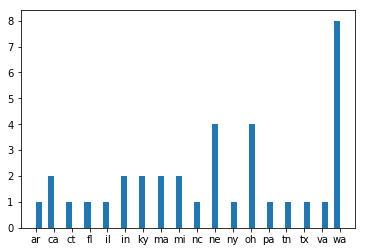

In [48]:
plt.hist(df20100704['state'], bins=50)
plt.show()

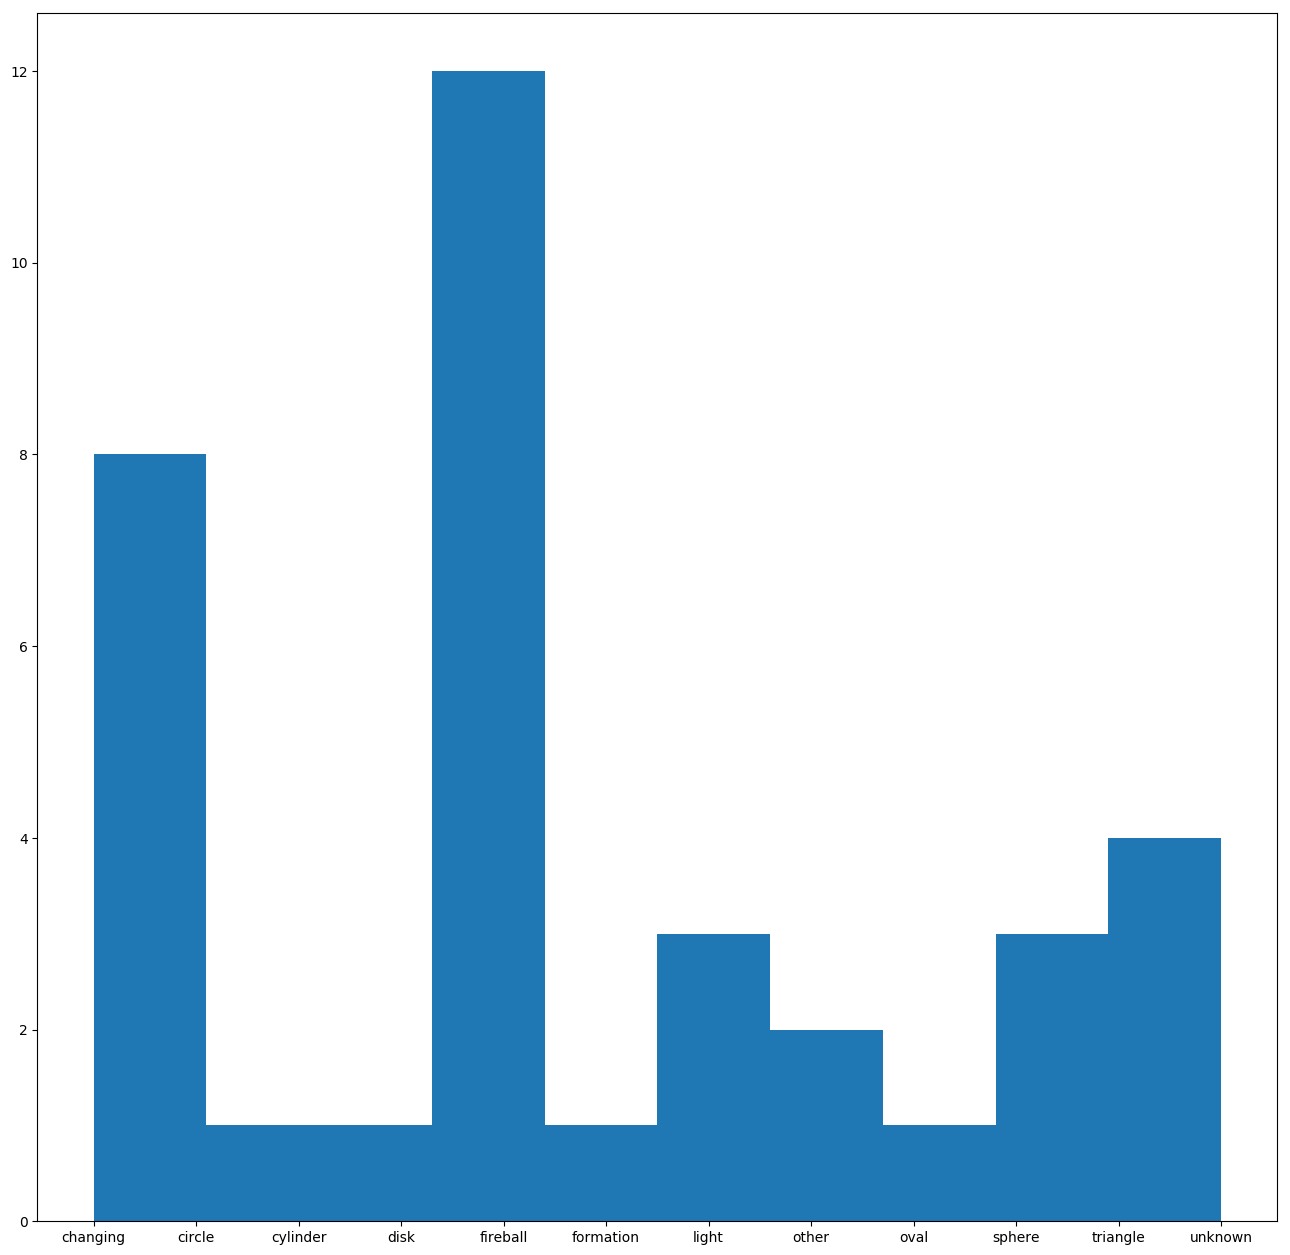

In [49]:
plt.figure(figsize=(16, 16), dpi=100)
plt.hist(df20100704['shape'], bins=10)
plt.show()

# GB

In [50]:
df_gb = df[df['country']=='gb']
df_gb.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,"city, state",date,year,month,day,time,count
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,NaN,1955-10-10,1955,10,10,17,1
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,NaN,1965-10-10,1965,10,10,21,1
20,1974-10-10 21:30:00,cardiff (uk/wales),NaN,gb,disk,1200.0,20 minutes,back in 1974 I was 19 at the time and lived i...,2007-02-01,51.5,-3.200000,NaN,1974-10-10,1974,10,10,21,1
24,1976-10-10 22:00:00,stoke mandeville (uk/england),NaN,gb,cigar,3.0,3 seconds,White object over Buckinghamshire UK.,2009-12-12,51.783333,-0.783333,NaN,1976-10-10,1976,10,10,22,1
39,1985-10-10 20:25:00,leeds (uk/england),NaN,gb,triangle,600.0,10min,three light in the sky that led to a big black...,2003-03-04,53.8,-1.583333,NaN,1985-10-10,1985,10,10,20,1


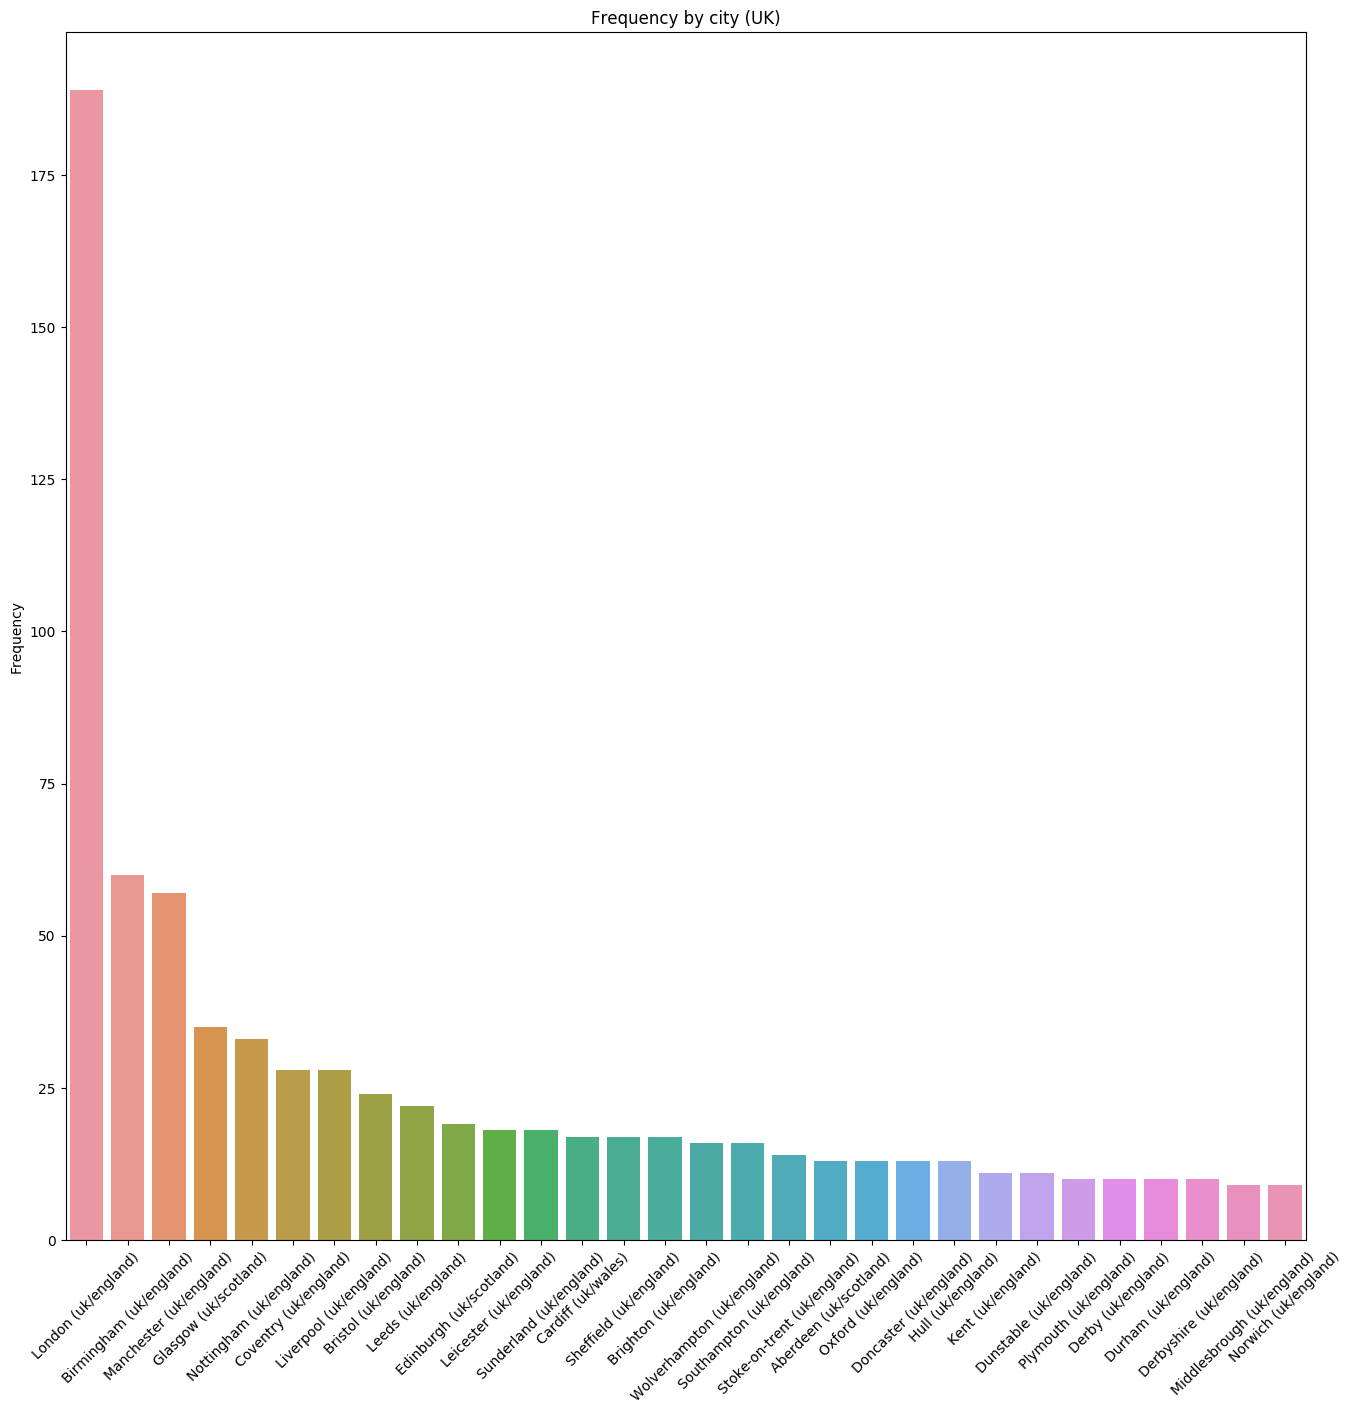

In [51]:
plt.figure(figsize=(16, 16), dpi=100)

cities = df_gb['city'].value_counts().keys()[:30]
cities = list(map(lambda x: x[0].upper() + x[1:], cities))
values = df_gb['city'].value_counts().values[:30]

by_city = sns.barplot(cities, values)
plt.setp(by_city.get_xticklabels(), rotation=45)

plt.title('Frequency by city (UK)')
plt.ylabel('Frequency')
plt.show()

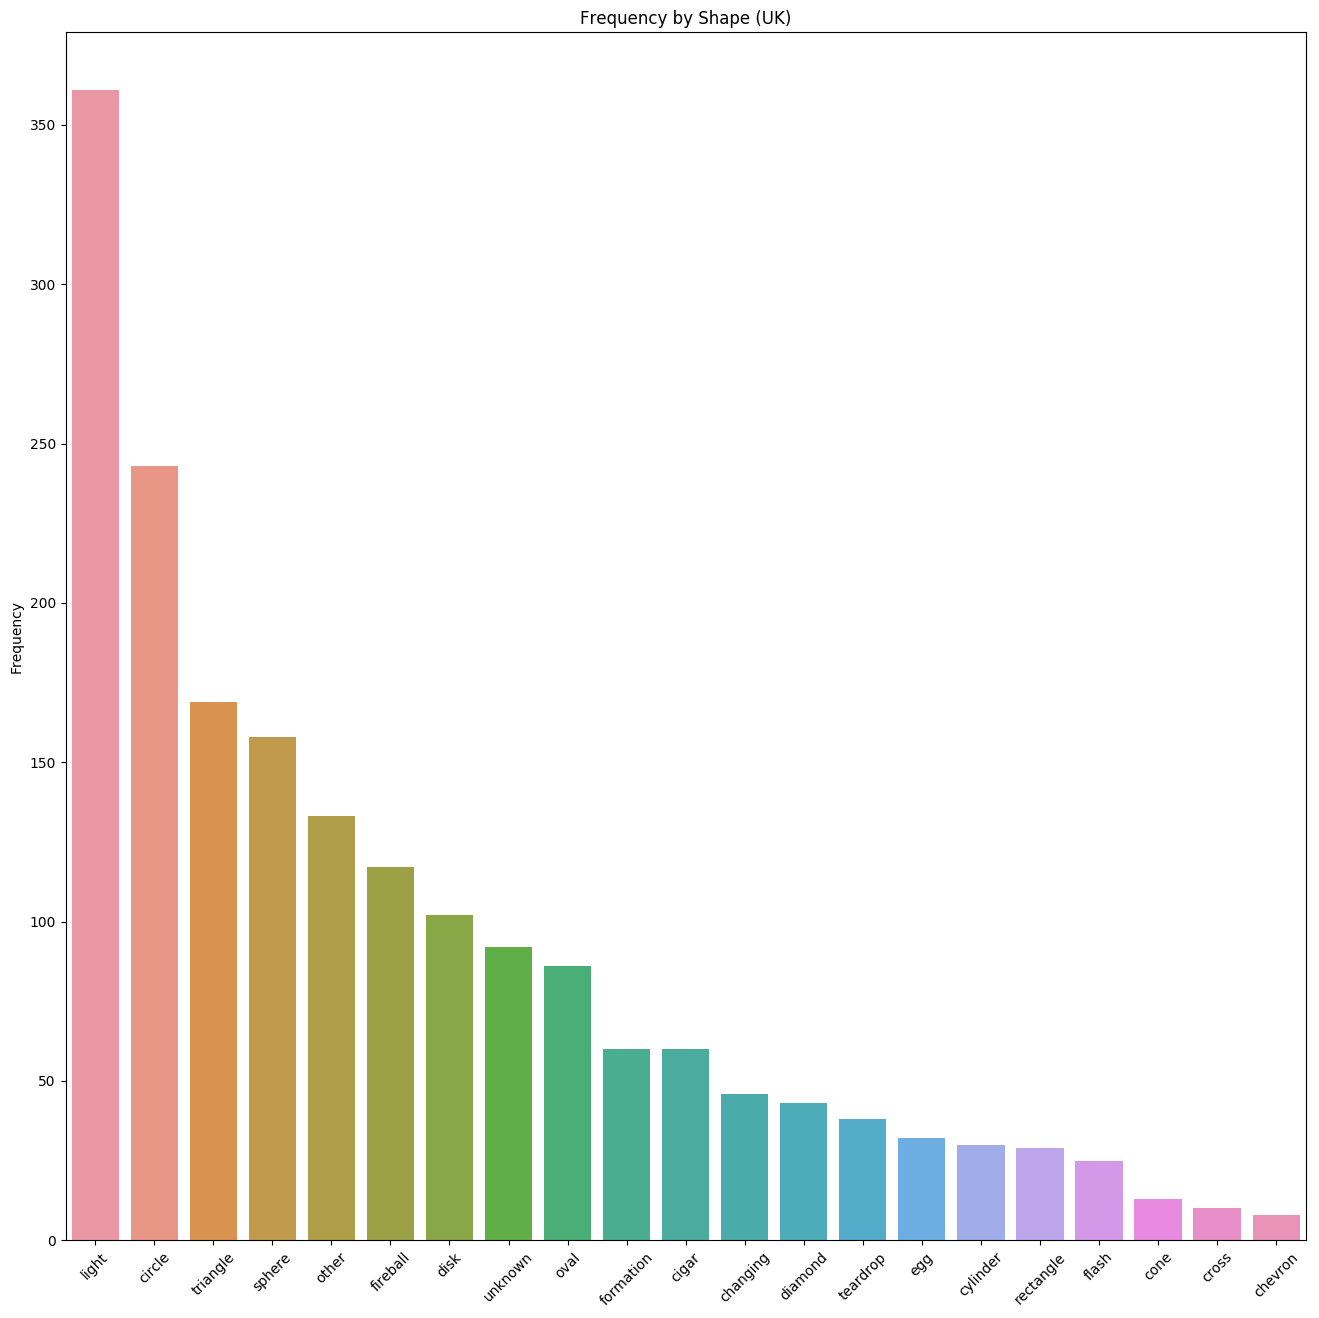

In [52]:
plt.figure(figsize=(16, 16), dpi=100)

shape = df_gb['shape'].value_counts().keys()
values = df_gb['shape'].value_counts().values

by_shape = sns.barplot(shape, values)
plt.setp(by_shape.get_xticklabels(), rotation=45)

plt.title('Frequency by Shape (UK)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dt = df_gb['datetime']

for date in dt:
    

In [53]:
df_gb['datetime'][2].date()

datetime.date(1955, 10, 10)

In [54]:
# 09/21-2012 is by far the most fequent date
df_gb['datetime'].value_counts()[:5]

2012-09-21 23:00:00    6
2002-08-12 23:15:00    3
2003-09-14 16:30:00    2
2001-11-15 22:00:00    2
2014-04-19 16:30:00    2
Name: datetime, dtype: int64

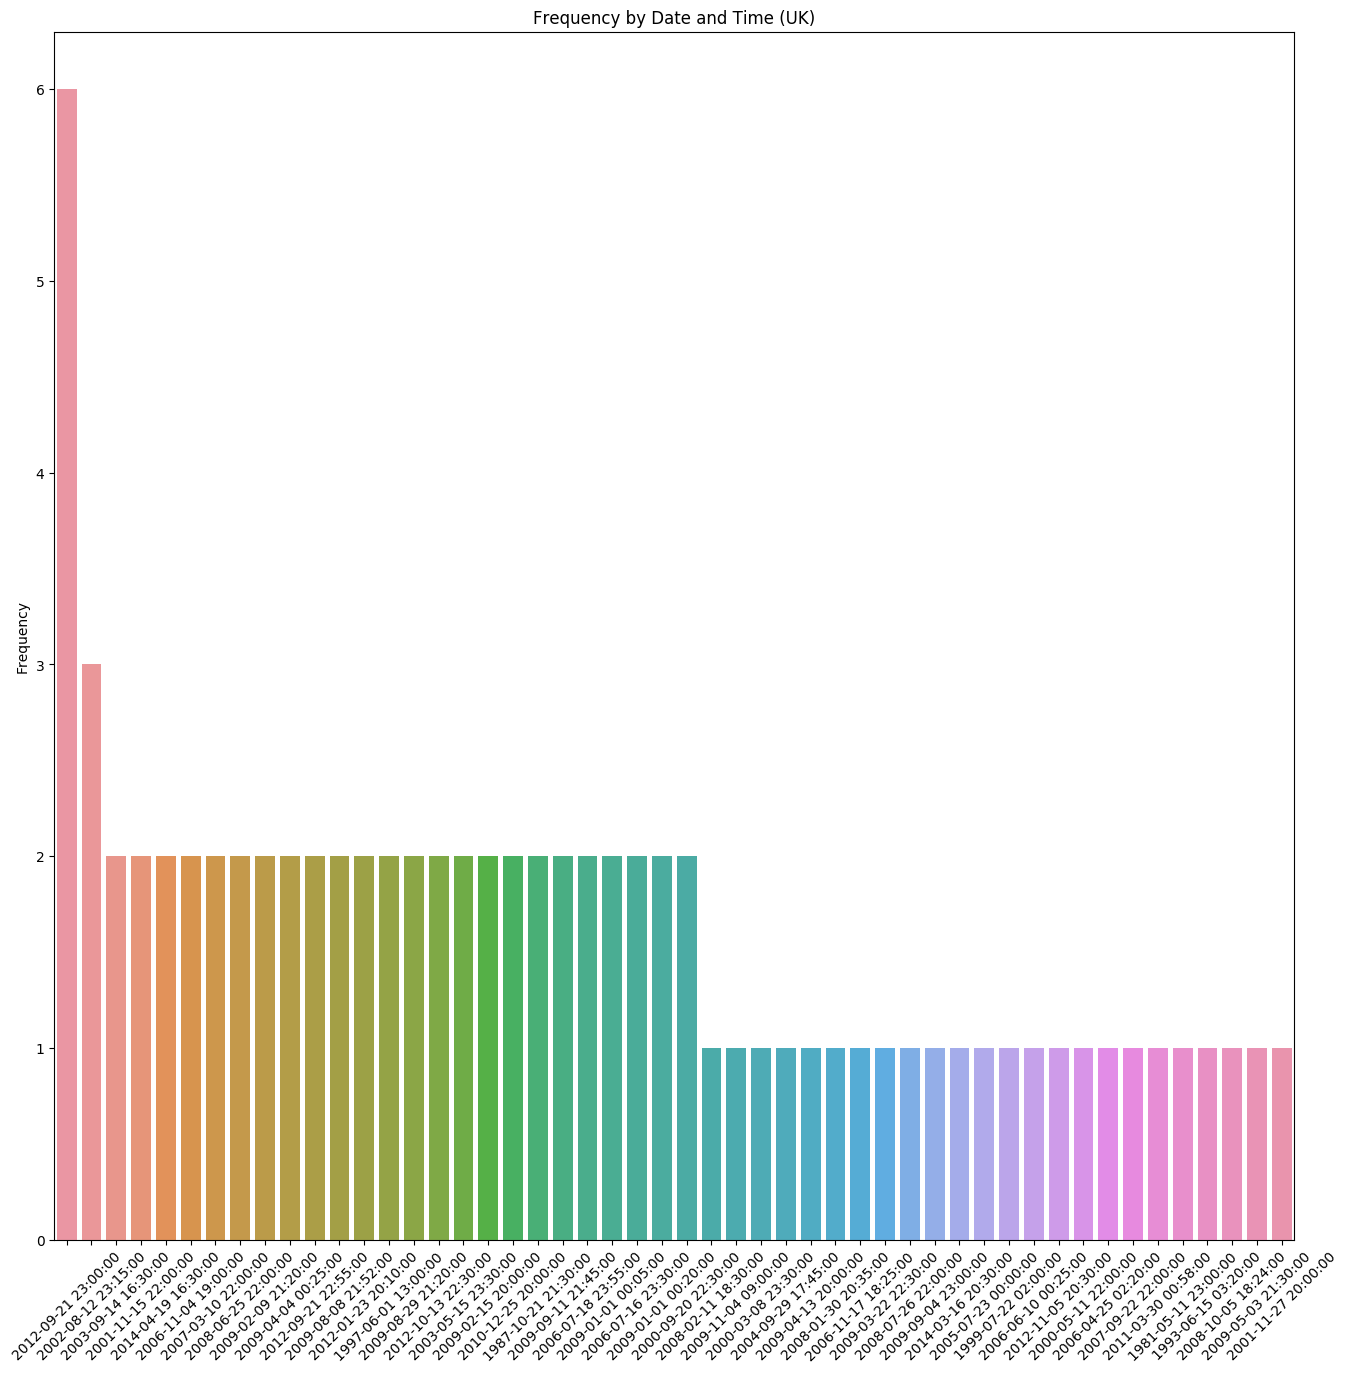

In [55]:
plt.figure(figsize=(16, 16), dpi=100)

dt = df_gb['datetime'].value_counts().keys()[:50]
values = df_gb['datetime'].value_counts().values[:50]

by_dt = sns.barplot(list(dt), values)
plt.setp(by_dt.get_xticklabels(), rotation=45)

plt.title('Frequency by Date and Time (UK)')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


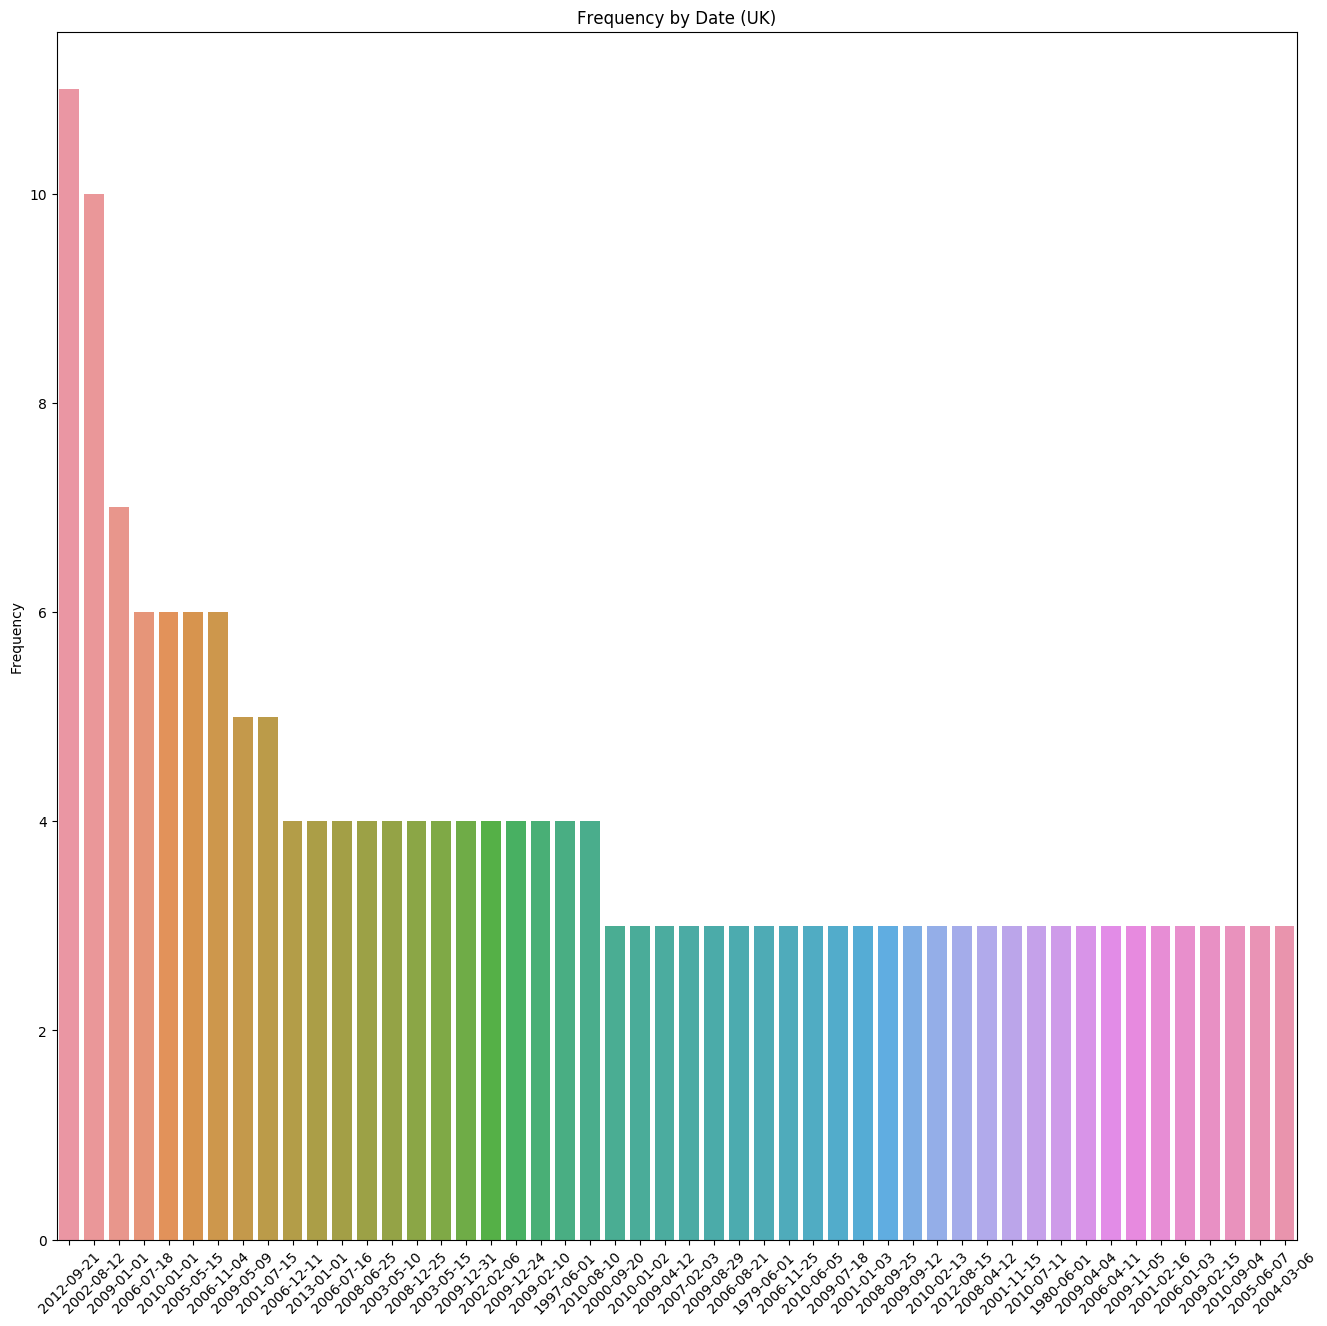

In [56]:
plt.figure(figsize=(16, 16), dpi=100)

dt = []
for date in df_gb['datetime']:
    dt.append(date.date())

df_gb['date'] = dt

dt = df_gb['date'].value_counts().keys()[:50]
values = df_gb['date'].value_counts().values[:50]

by_dt = sns.barplot(dt, values)
plt.setp(by_dt.get_xticklabels(), rotation=45)

plt.title('Frequency by Date (UK)')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


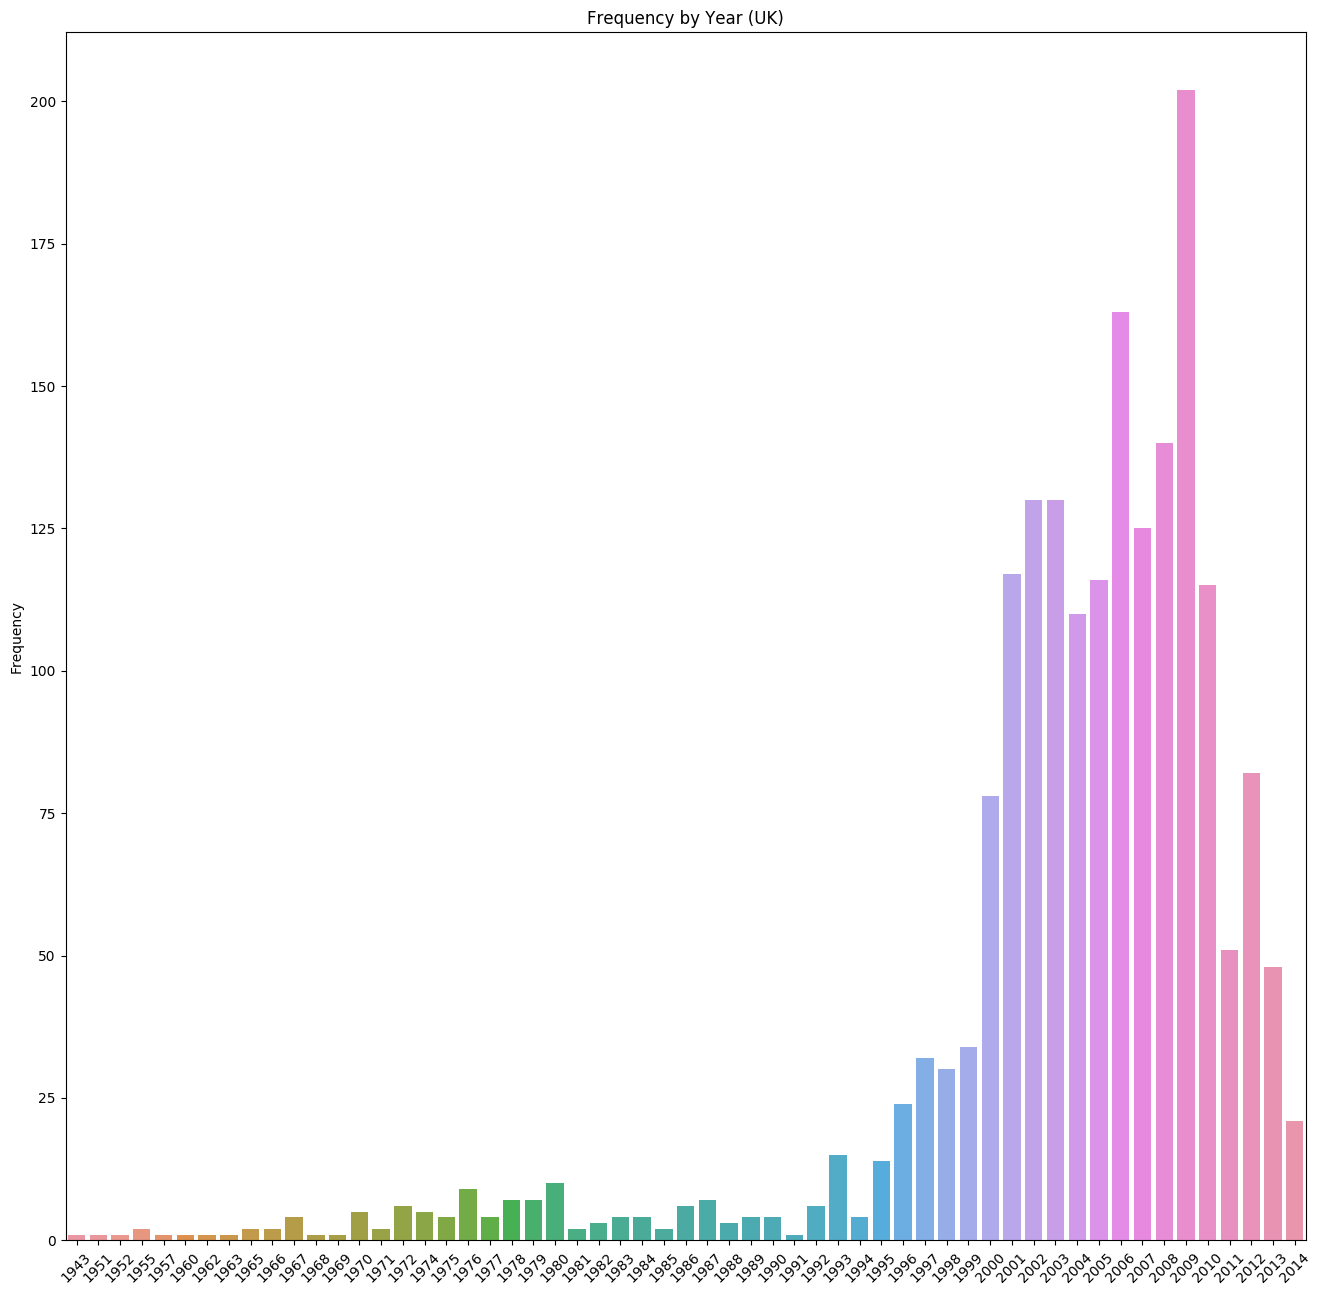

In [57]:
years = []

for date in df_gb['datetime']:
    years.append(date.year)

df_gb['year'] = years

years = pd.Series(years).value_counts()

years_ = years.keys()
values = years.values

plt.figure(figsize=(16, 16), dpi=100)
by_y = sns.barplot(years_, values)
plt.setp(by_y.get_xticklabels(), rotation=45)

plt.title('Frequency by Year (UK)')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


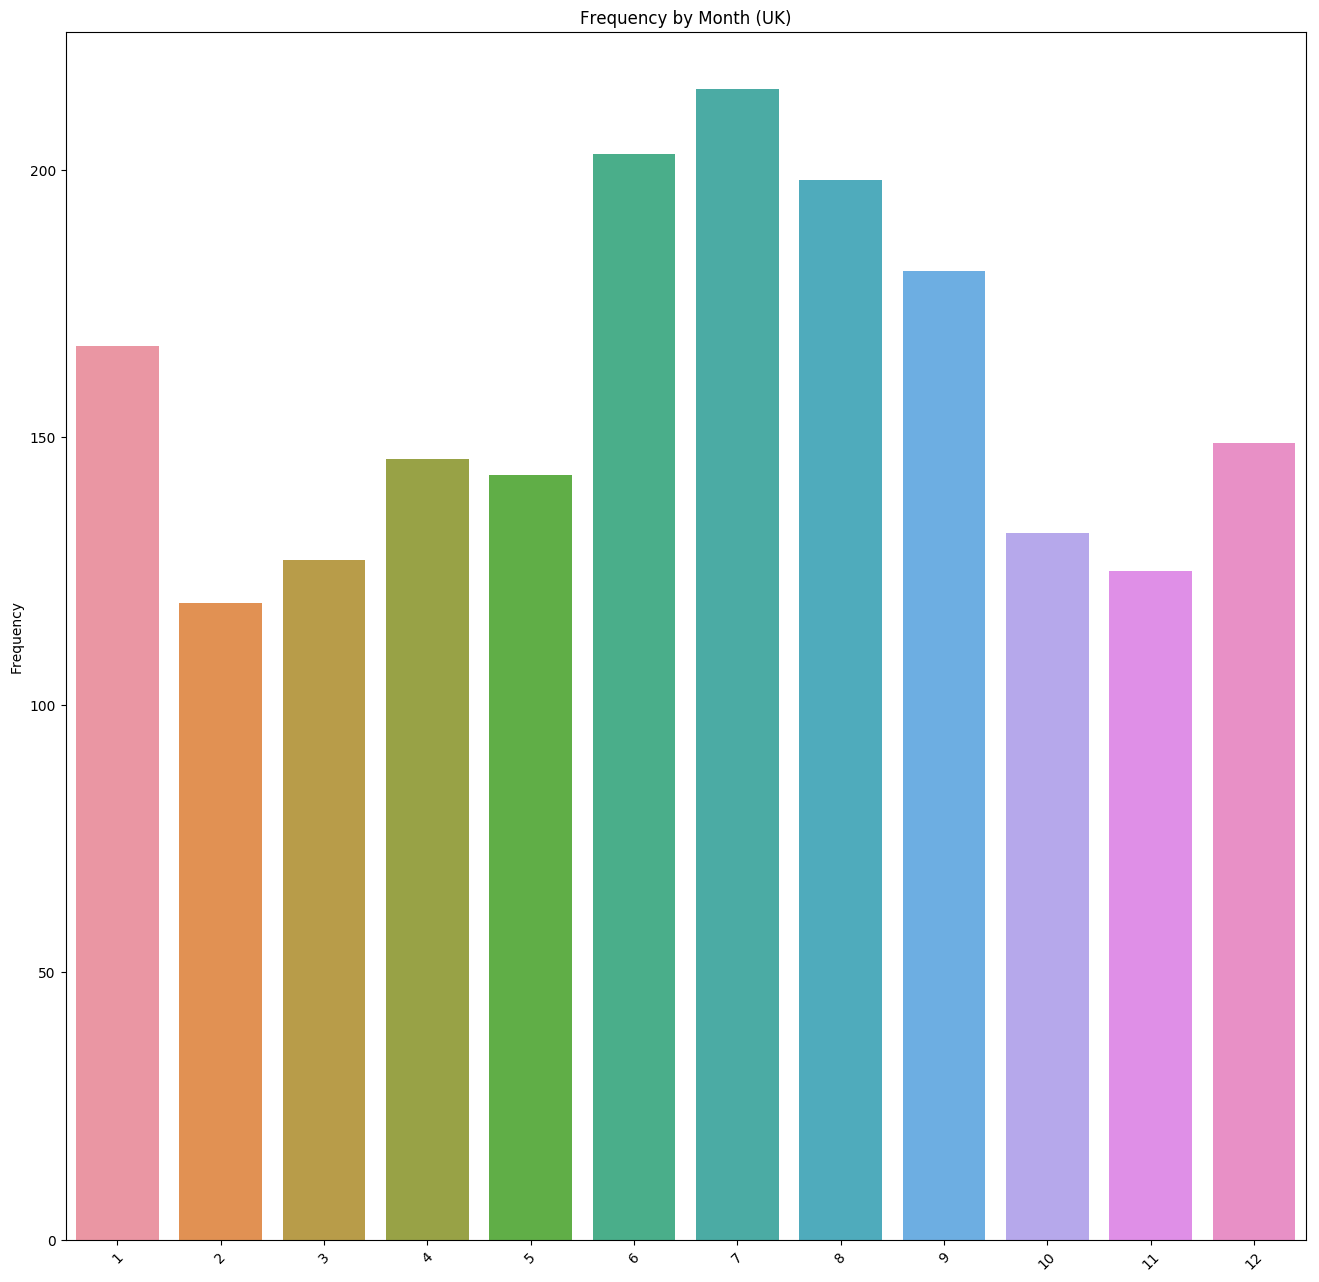

In [58]:
months = []

for date in df_gb['datetime']:
    months.append(date.month)
    
df_gb['month'] = months

months = pd.Series(months).value_counts()

months_ = months.keys()
values = months.values

plt.figure(figsize=(16, 16), dpi=100)
by_m = sns.barplot(months_, values)
plt.setp(by_m.get_xticklabels(), rotation=45)

plt.title('Frequency by Month (UK)')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


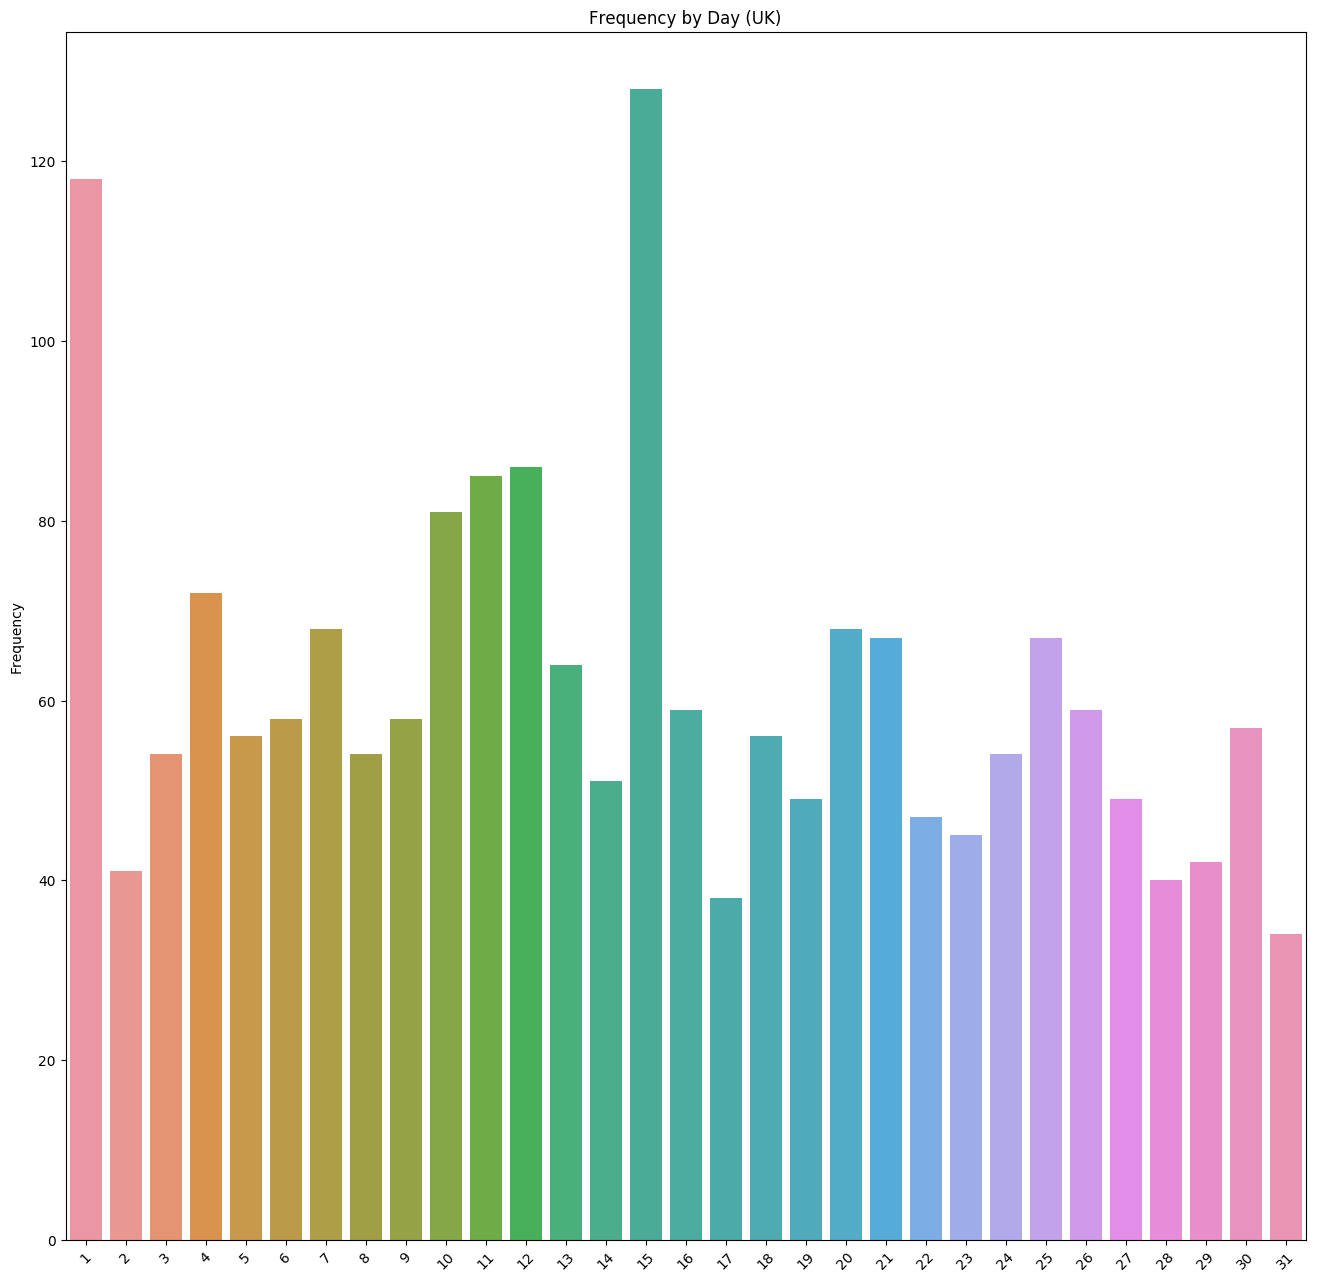

In [59]:
days = []

for date in df_gb['datetime']:
    days.append(date.day)
    
df_gb['day'] = days

days = pd.Series(days).value_counts()

days_ = days.keys()
values = days.values

plt.figure(figsize=(16, 16), dpi=100)
by_d = sns.barplot(days_, values)
plt.setp(by_d.get_xticklabels(), rotation=45)

plt.title('Frequency by Day (UK)')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


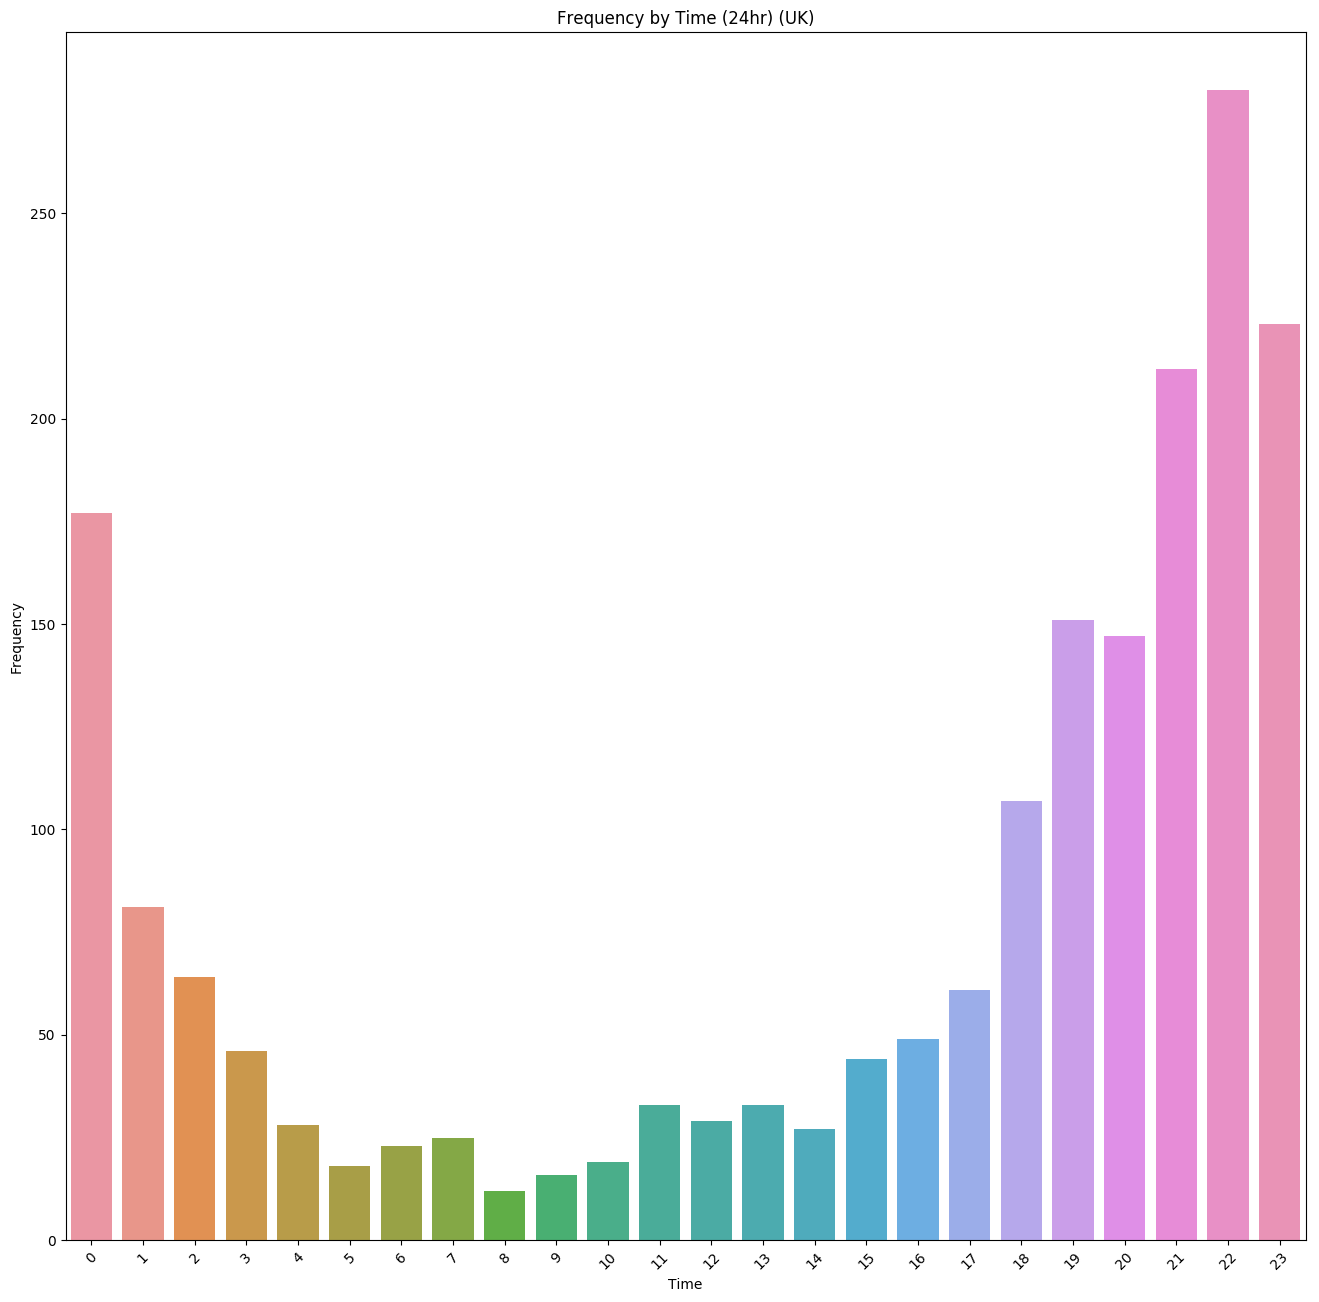

In [60]:
hours = []

for date in df_gb['datetime']:
    hours.append(date.hour)

df_gb['time'] = hours

hours = pd.Series(hours).value_counts()

hours_ = hours.keys()
values = hours.values

plt.figure(figsize=(16, 16), dpi=100)
by_h = sns.barplot(hours_, values)
plt.setp(by_h.get_xticklabels(), rotation=45)

plt.title('Frequency by Time (24hr) (UK)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

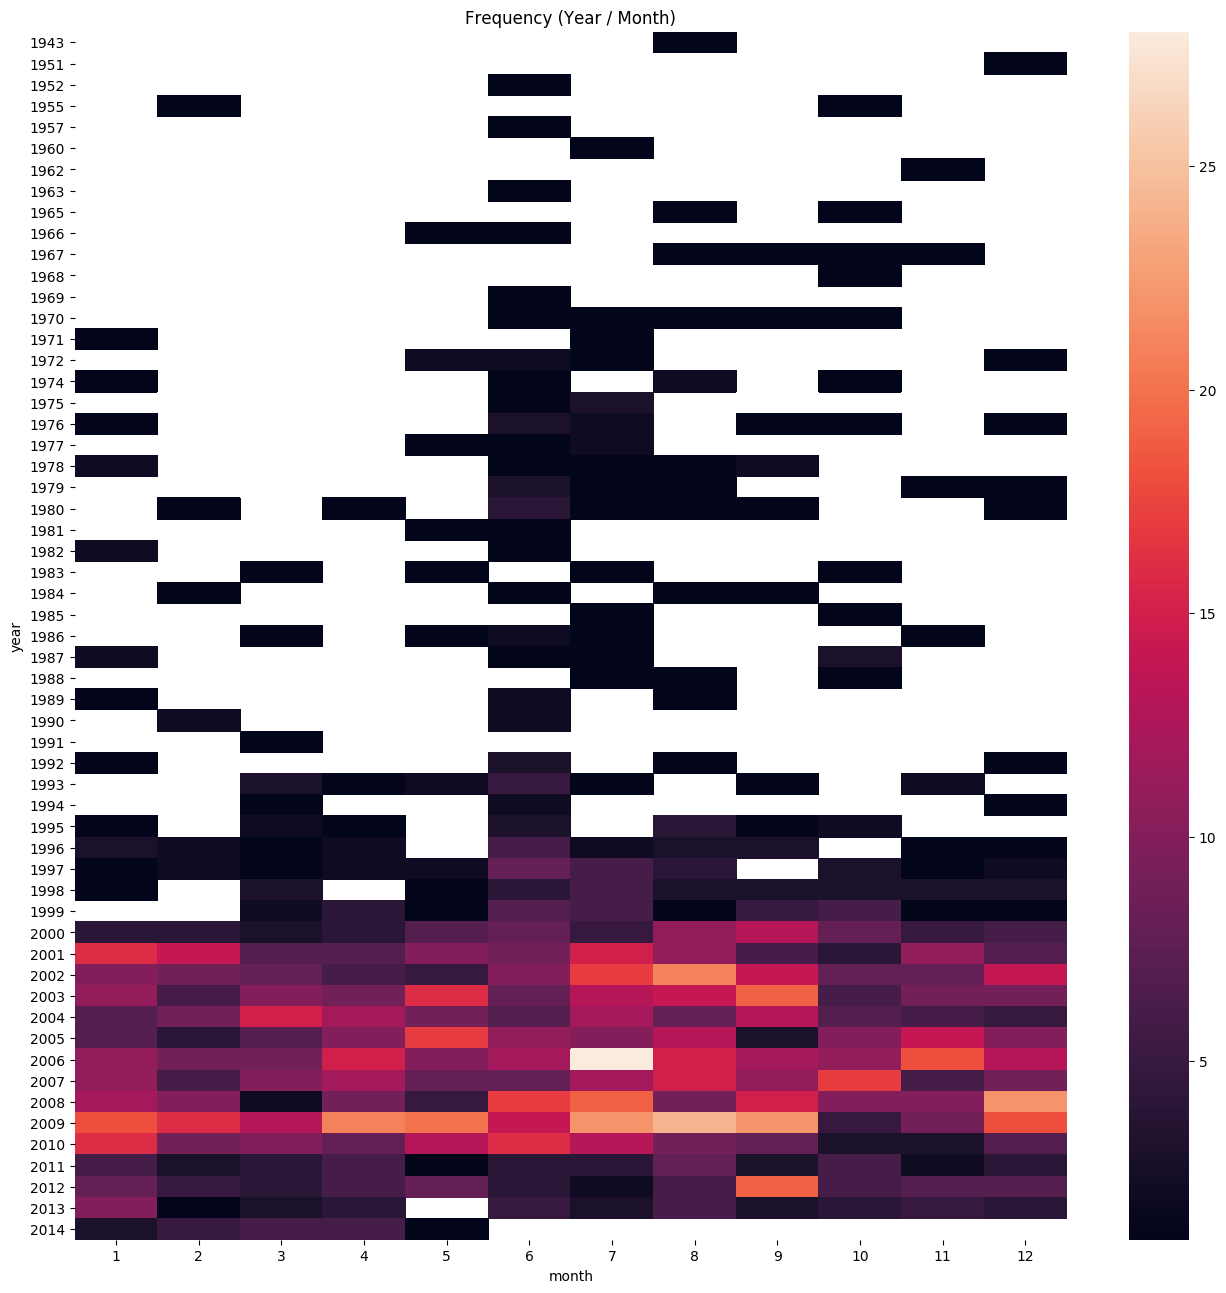

In [61]:
year_month = pd.pivot_table(df_gb, index='year', columns='month', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(year_month)

plt.title('Frequency (Year / Month)')
plt.show()

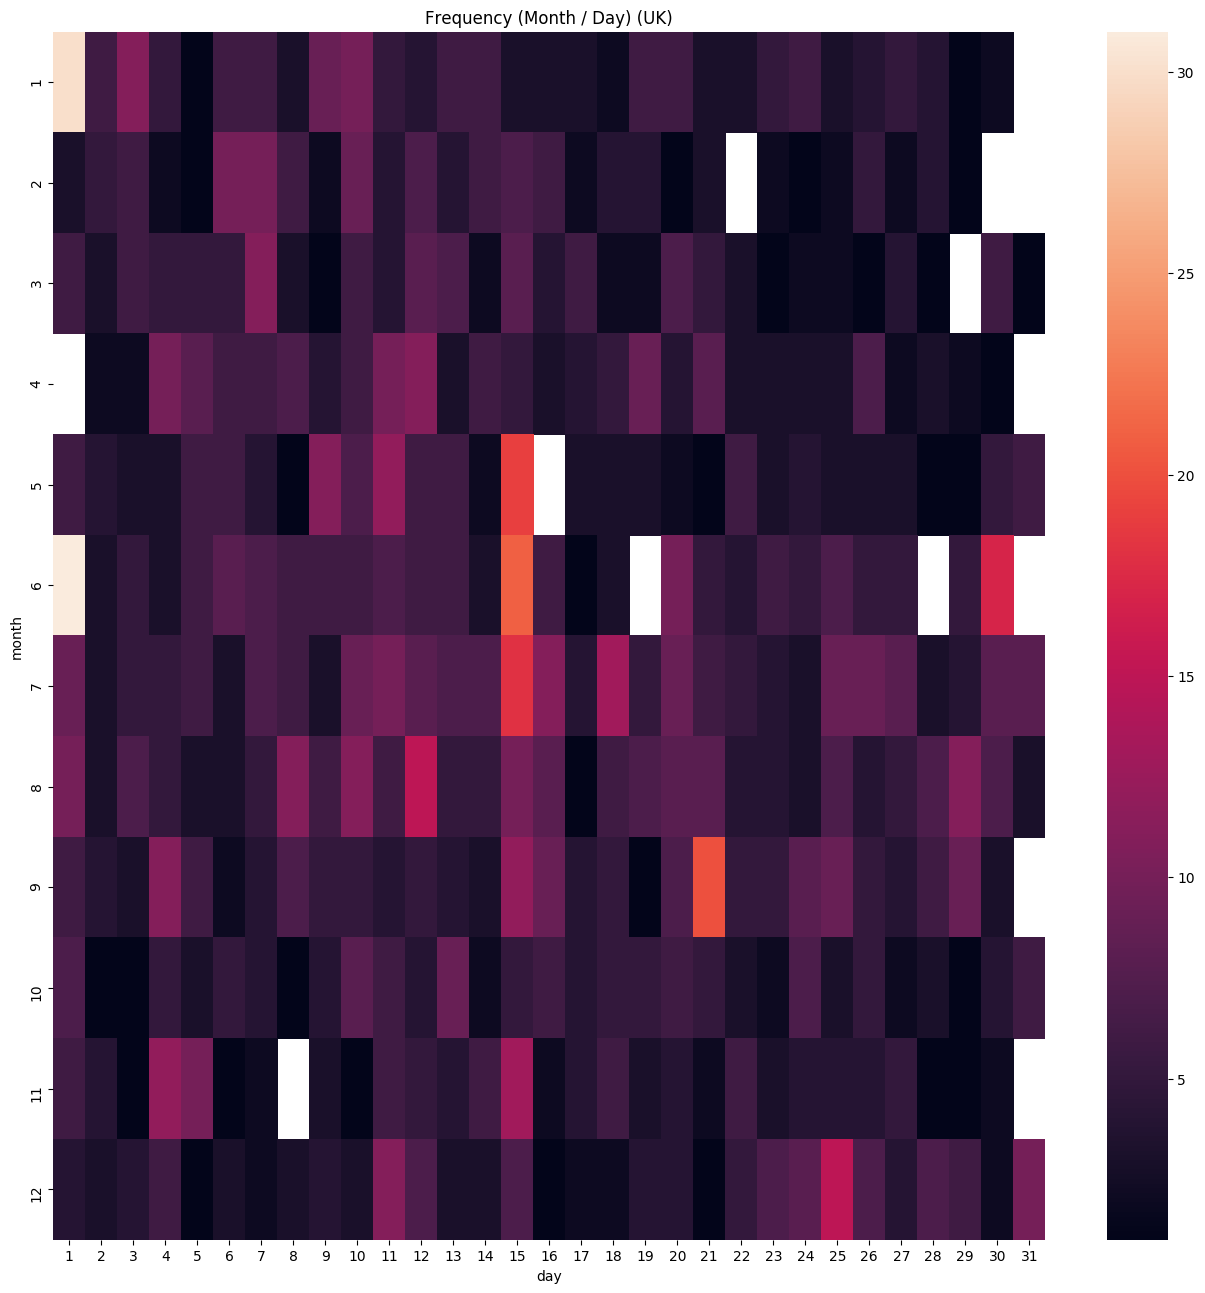

In [62]:
year_month = pd.pivot_table(df_gb, index='month', columns='day', values = 'count', aggfunc = sum)

plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(year_month)

plt.title('Frequency (Month / Day) (UK)')
plt.show()

1) 誤認と思われる日付、場所を排除する
    7/4, 1/1: 新年の花火
    シアトル＝軍の施設が集中
    meteo shower (獅子座流星群は11/16に集中）
    衛星のreenter
    200? 11/?? しし座流星群
    2009/09/1? １ヶ月前に封切りされた第九地区の影響？周辺の日付も上昇していればそう。

2) Normalize
    人口でnormalizeする
    月の日数でnormalizeする

3) 違う国と比較
    イギリス
    日本

4) 広く統計を取るのもいいが、特定の集中している日付、場所に注目するのも重要なのでは

同じ日付で違う時間を集計する
